In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# # get the dataset
# def get_dataset():
# 	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# 	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore depths from 1 to 15
	for i in range(1,16):
		# define base model
		base = DecisionTreeClassifier(max_depth=i)
		# define ensemble model
		models[str(i)] = AdaBoostClassifier(base_estimator=base)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=5, n_jobs=-1)
	return scores

# Goal Statement

The goal of this model is to **predict tomorrow's weather, will it rain or not**.

# Data Documentation

1. Date - The date of observation
2. Location - The common name of the location of the weather station
3. MinTemp - The minimum temperature in degrees celsius
4. MaxTemp - The maximum temperature in degrees celsius
5. Rainfall - The amount of rainfall recorded for the day in mm
6. Evaporation - The so-called Class A pan evaporation (mm) in the 24 hours to 9am
7. Sunshine - The number of hours of bright sunshine in the day.
8. WindGustDir - The direction of the strongest wind gust in the 24 hours to midnight
9. WindGustSpeed - The speed (km/h) of the strongest wind gust in the 24 hours to midnight
10. WindDir9am - Direction of the wind at 9am
11. WindDir3pm - Direction of the wind at 3pm
12. WindSpeed9am - Wind speed (km/hr) averaged over 10 minutes prior to 9am
13. WindSpeed3pm - Wind speed (km/hr) averaged over 10 minutes prior to 3pm
14. Humidity9am - Humidity (percent) at 9am
15. Humidity3pm - Humidity (percent) at 3pm
16. Pressure9am - Atmospheric pressure (hpa) reduced to mean sea level at 9am
17. Pressure3pm - Atmospheric pressure (hpa) reduced to mean sea level at 3pm
18. Cloud9am - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
19. Cloud3pm - Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
20. Temp9am - Temperature (degrees C) at 9am
21. Temp3pm - Temperature (degrees C) at 3pm
22. RainToday - Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
23. RainTomorrow - The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".

# 1. Data Loading

In [ ]:

#Load Data Set
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import Data Set
df = pd.read_csv('/content/drive/MyDrive/Rain Tomorrow/weatherAUS.csv')
df.head()

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0  2008-12-01   Albury     13.4  ...     21.8         No            No
1  2008-12-02   Albury      7.4  ...     24.3         No            No
2  2008-12-03   Albury     12.9  ...     23.2         No            No
3  2008-12-04   Albury      9.2  ...     26.5         No            No
4  2008-12-05   Albury     17.5  ...     29.7         No            No

[5 rows x 23 columns]

# Data Understanding

In [ ]:
# Identified Locations

df.groupby(by = 'Location').mean()

MinTemp    MaxTemp  ...    Temp9am    Temp3pm
Location                                ...                      
Adelaide          12.579505  22.898934  ...  16.929046  21.557447
Albany            12.948438  20.070998  ...  16.236455  18.411555
Albury             9.530604  22.640872  ...  14.361135  21.373780
AliceSprings      13.142284  29.248420  ...  21.335658  28.010764
BadgerysCreek     11.131719  24.031208  ...  16.571698  22.522698
Ballarat           7.367950  18.287266  ...  11.672457  16.788365
Bendigo            8.593713  21.621746  ...  13.845275  20.249737
Brisbane          16.423807  26.448380  ...  21.841173  24.753461
Cairns            21.220467  29.558849  ...  25.820105  27.909112
Canberra           6.821866  20.976639  ...  12.677297  19.472878
Cobar             13.149451  25.870093  ...  18.119160  24.545203
CoffsHarbour      14.437108  23.965385  ...  20.170942  22.343873
Dartmoor           8.620034  19.697454  ...  12.588893  18.182139
Darwin            23.209305  32.540977  ...  27.185625  31.082733
GoldCoast         17.363286  25.767062  ...  22.375847  23.771603
Hobart             9.078578  17.865727  ...  12.462406  16.172955
Katherine         20.553564  34.935436  ...  26.649544  33.546604
Launceston         7.836190  18.954911  ...  12.026269  17.687294
Melbourne         11.779174  20.769358  ...  14.596091  19.264489
MelbourneAirport   9.973945  20.491858  ...  14.124925  18.952077
Mildura           10.731572  24.840944  ...  15.528291  23.427726
Moree             12.905853  26.950548  ...  18.867132  25.651113
MountGambier       8.825477  19.828995  ...  13.784858  18.176277
MountGinini        3.577280  11.663676  ...   6.815185  10.209180
Newcastle         13.760007  24.101070  ...  18.119251  22.325534
Nhil               8.999809  22.405153  ...  13.382708  20.871837
NorahHead         15.355481  22.588937  ...  18.467611  20.764211
NorfolkIsland     16.871875  21.830253  ...  19.783822  20.470070
Nuriootpa          9.363242  21.704133  ...  14.852064  20.305663
PearceRAAF        12.303850  26.051238  ...  18.832230  24.497083
Penrith           12.577449  24.764366  ...  16.984267  23.354091
Perth             12.922706  25.034837  ...  18.573598  23.461748
PerthAirport      12.580359  25.533234  ...  18.773480  24.086935
Portland           9.586867  18.055053  ...  13.195745  16.504204
Richmond          11.364202  24.458664  ...  16.566015  23.128682
Sale               8.567420  20.282281  ...  13.416628  18.782646
SalmonGums         9.313007  24.250827  ...  17.046610  22.661518
Sydney            14.866826  23.001975  ...  17.821923  21.533473
SydneyAirport     14.901729  23.383915  ...  18.544880  21.780352
Townsville        20.417874  29.367160  ...  25.634967  27.769934
Tuggeranong        7.242133  20.767545  ...  12.573899  19.422472
Uluru             14.466688  30.383195  ...  21.012348  29.054511
WaggaWagga         9.617182  23.031871  ...  14.925457  21.749950
Walpole           11.806631  20.459184  ...  15.926158  18.560134
Watsonia          10.131879  20.896078  ...  13.766010  19.395181
Williamtown       12.780180  24.001065  ...  18.079694  22.499435
Witchcliffe       10.775067  21.686247  ...  16.542895  19.810376
Wollongong        14.939471  21.468174  ...  18.190203  19.934872
Woomera           13.363727  26.596707  ...  17.924701  25.201896

[49 rows x 16 columns]

In [ ]:
# Find the shape of dataset

df.shape

(145460, 23)

In [ ]:
df

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0       2008-12-01   Albury     13.4  ...     21.8         No            No
1       2008-12-02   Albury      7.4  ...     24.3         No            No
2       2008-12-03   Albury     12.9  ...     23.2         No            No
3       2008-12-04   Albury      9.2  ...     26.5         No            No
4       2008-12-05   Albury     17.5  ...     29.7         No            No
...            ...      ...      ...  ...      ...        ...           ...
145455  2017-06-21    Uluru      2.8  ...     22.4         No            No
145456  2017-06-22    Uluru      3.6  ...     24.5         No            No
145457  2017-06-23    Uluru      5.4  ...     26.1         No            No
145458  2017-06-24    Uluru      7.8  ...     26.0         No            No
145459  2017-06-25    Uluru     14.9  ...     20.9         No           NaN

[145460 rows x 23 columns]

In [ ]:
# Find the datatype of each attribute

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
# Statistics for Float attributes
df.describe()

MinTemp        MaxTemp  ...        Temp9am       Temp3pm
count  143975.000000  144199.000000  ...  143693.000000  141851.00000
mean       12.194034      23.221348  ...      16.990631      21.68339
std         6.398495       7.119049  ...       6.488753       6.93665
min        -8.500000      -4.800000  ...      -7.200000      -5.40000
25%         7.600000      17.900000  ...      12.300000      16.60000
50%        12.000000      22.600000  ...      16.700000      21.10000
75%        16.900000      28.200000  ...      21.600000      26.40000
max        33.900000      48.100000  ...      40.200000      46.70000

[8 rows x 16 columns]

In [ ]:
# Statistics for object attributes

df.describe(include="object")

Date  Location WindGustDir  ... WindDir3pm RainToday RainTomorrow
count       145460    145460      135134  ...     141232    142199       142193
unique        3436        49          16  ...         16         2            2
top     2016-04-05  Canberra           W  ...         SE        No           No
freq            49      3436        9915  ...      10838    110319       110316

[4 rows x 7 columns]

In [ ]:
# Convert datatype of date object to datetime

df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0        2008-12-01
1        2008-12-02
2        2008-12-03
3        2008-12-04
4        2008-12-05
            ...    
145455   2017-06-21
145456   2017-06-22
145457   2017-06-23
145458   2017-06-24
145459   2017-06-25
Name: Date, Length: 145460, dtype: datetime64[ns]

In [ ]:
# Find Null Data

df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
# Find Duplicates

duplicate = df[df.duplicated()]
duplicate

Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []

There is **no duplicate** object in the data set

## Data Explore

In [ ]:
df1 = df.copy()
df1

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0      2008-12-01   Albury     13.4  ...     21.8         No            No
1      2008-12-02   Albury      7.4  ...     24.3         No            No
2      2008-12-03   Albury     12.9  ...     23.2         No            No
3      2008-12-04   Albury      9.2  ...     26.5         No            No
4      2008-12-05   Albury     17.5  ...     29.7         No            No
...           ...      ...      ...  ...      ...        ...           ...
145455 2017-06-21    Uluru      2.8  ...     22.4         No            No
145456 2017-06-22    Uluru      3.6  ...     24.5         No            No
145457 2017-06-23    Uluru      5.4  ...     26.1         No            No
145458 2017-06-24    Uluru      7.8  ...     26.0         No            No
145459 2017-06-25    Uluru     14.9  ...     20.9         No           NaN

[145460 rows x 23 columns]

In [ ]:
df1.sort_values(by=['Date', 'Location'])

Date     Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
45587  2007-11-01     Canberra      8.0  ...     23.6         No           Yes
45588  2007-11-02     Canberra     14.0  ...     25.7        Yes           Yes
45589  2007-11-03     Canberra     13.7  ...     20.2        Yes           Yes
45590  2007-11-04     Canberra     13.3  ...     14.1        Yes           Yes
45591  2007-11-05     Canberra      7.6  ...     15.4        Yes            No
...           ...          ...      ...  ...      ...        ...           ...
80997  2017-06-25     Watsonia      7.9  ...     11.7         No            No
42546  2017-06-25  Williamtown      6.8  ...     19.4         No            No
114619 2017-06-25  Witchcliffe      8.5  ...     14.6         No            No
45586  2017-06-25   Wollongong      8.0  ...     17.6         No            No
108570 2017-06-25      Woomera      6.5  ...     16.8         No           NaN

[145460 rows x 23 columns]

In [ ]:
print('earliest date is',min(df1.Date))
print('newest date is',max(df1.Date))

earliest date is 2007-11-01 00:00:00
newest date is 2017-06-25 00:00:00


In [ ]:
# memisahkan day month and year
df1['Day'] = df1.Date.dt.strftime('%j')
df1['Month'] = df1.Date.dt.strftime('%m')
df1['Year'] = df1.Date.dt.year

In [ ]:
df1.sort_values(by=['Date'])

Date          Location  MinTemp  ...  Day  Month  Year
45587  2007-11-01          Canberra      8.0  ...  305     11  2007
45588  2007-11-02          Canberra     14.0  ...  306     11  2007
45589  2007-11-03          Canberra     13.7  ...  307     11  2007
45590  2007-11-04          Canberra     13.3  ...  308     11  2007
45591  2007-11-05          Canberra      7.6  ...  309     11  2007
...           ...               ...      ...  ...  ...    ...   ...
64190  2017-06-25              Sale      0.1  ...  176     06  2017
67199  2017-06-25  MelbourneAirport      5.5  ...  176     06  2017
70392  2017-06-25         Melbourne      8.6  ...  176     06  2017
123830 2017-06-25             Perth      6.3  ...  176     06  2017
145459 2017-06-25             Uluru     14.9  ...  176     06  2017

[145460 rows x 26 columns]

## Data Understanding Statement

  The data set is consists of the weather conditions of 49 different locations in Australia **from 1 November 2007 until 25 June 2017**. It is consists of 23 columns with approximately 145K rows. The number of data collected is **not equal for all locations**, so there will be an imbalance data amount between locations.

  The columns is consist of **1 dependent variable ('RainTomorrow')** , which called target, and **22 independent variables**, which called features. The features are consist of numerical features, categorical features, and date features. 

  Each row of the data set represents a weather condition (temperature, pressure, cloud, etc) on a certain day of a location in Australia. 

# Exploratory Data Analysis

In [ ]:
# Checking for the missing values in the target variable

df1['RainTomorrow'].isnull().sum()

3267

Because 'RainTomorrow' is **the target** so we **could not impute the missing values**. Dropping the missing values in 'RainTomorrow' considered to be the best way to handle the missing values.

In [ ]:
# droping the missing value
df1 = df1.dropna(subset = ['RainTomorrow'])

## 1. Berapa besar risiko turun hujan pada setiap tanggal dan setiap bulan sepanjang tahun?

In [ ]:
df1.loc[(df.RainToday == 'Yes'), ['RainToday_N']] = 1
df1.loc[(df.RainToday == 'No'), ['RainToday_N']] = 0
df1.loc[(df.RainTomorrow == 'Yes'), ['RainTomorrow_N']] = 1
df1.loc[(df.RainTomorrow == 'No'), ['RainTomorrow_N']] = 0
monthly_rain = df1.groupby('Month').agg(sum_of_rain = ('RainToday_N', 'sum'),
                                        count_of_total = ('RainToday_N', 'count'))
monthly_rain['Rain_Probability'] = monthly_rain['sum_of_rain'] / monthly_rain['count_of_total'] * 100

daily_rain = df1.groupby('Day').agg(sum_of_rain = ('RainToday_N', 'sum'),
                                        count_of_total = ('RainToday_N', 'count'))
daily_rain['Rain_Probability'] = daily_rain['sum_of_rain'] / daily_rain['count_of_total'] * 100


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
max_month_prob = max(monthly_rain.Rain_Probability)
max_daily_prob = max(daily_rain.Rain_Probability)

print('Max monthly rain probability is', max_month_prob)
print('Max daily rain probability is', max_daily_prob)

Max monthly rain probability is 26.98970840480274
Max daily rain probability is 39.14209115281501


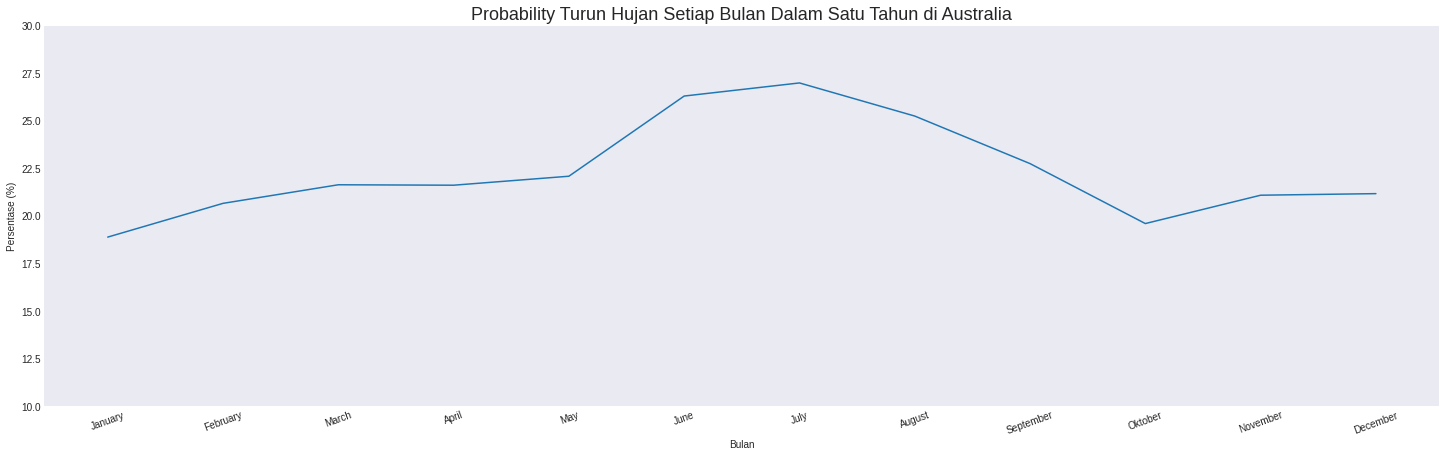

In [ ]:
# Plot distribusi peluang turunnya hujan pada bulan tertentu
plt.style.use('seaborn-dark')
plt.figure(figsize=(25, 7))
plt.title('Probability Turun Hujan Setiap Bulan Dalam Satu Tahun di Australia', fontsize = 18)
plt.ylim(10, 30)
plt.xlabel('Bulan')
plt.ylabel('Persentase (%)')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'Oktober', 'November', 'December'] , rotation = 20)
plt.plot(monthly_rain.index, monthly_rain.Rain_Probability)
plt.show()

Peluang turun hujan terbesar berada pada bulan **July**, dengan kata lain dapat dikatakan bahwa bulan **July** adalah bulan dengan kemungkinan hujan terbesar di Australia

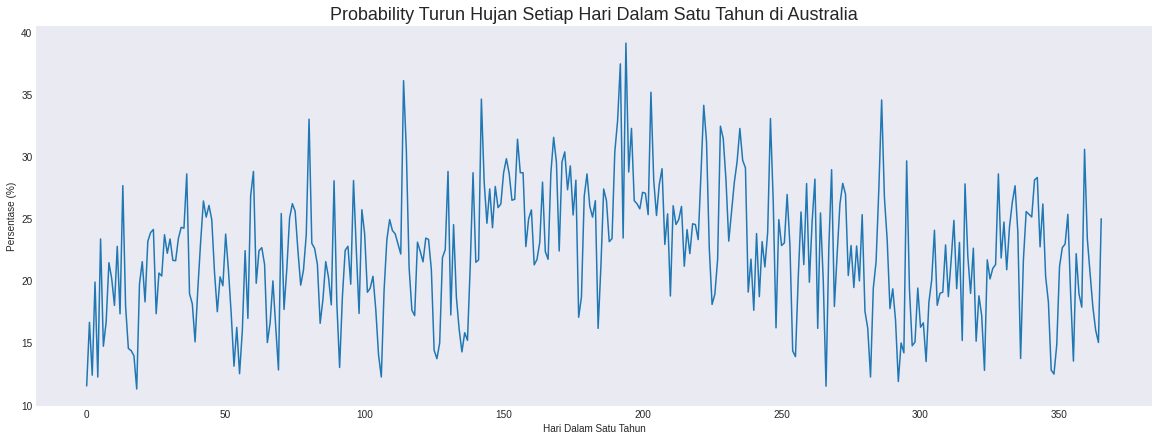

In [ ]:
# plot distribusi peluang turunnya hujan pada hari tertentu
plt.style.use('seaborn-dark')
plt.figure(figsize=(20, 7))
plt.title('Probability Turun Hujan Setiap Hari Dalam Satu Tahun di Australia', fontsize = 18)
plt.xlabel('Hari Dalam Satu Tahun')
plt.ylabel('Persentase (%)')
plt.xticks([0, 50, 100, 150, 200, 250, 300, 350], [0, 50, 100, 150, 200, 250, 300, 350])
plt.plot(daily_rain.index, daily_rain.Rain_Probability)
plt.show()

Jika dilihat dalam rentang waktu harian, nilai probabilitas turun hujan pada setiap harinya fluktuatif. Namun probability terbesar >35%

## 2. Berapa besar risiko turun hujan pada setiap kota dalam satu tahun?

In [ ]:
# definisi variabel location

location_rain = df1.groupby('Location').agg(sum_of_rain = ('RainToday_N', 'sum'),
                                        count_of_total = ('RainToday_N', 'count'))

location_rain['Rain_Probability'] = location_rain['sum_of_rain'] / location_rain['count_of_total'] * 100

location_rain.describe()

sum_of_rain  count_of_total  Rain_Probability
count    49.000000       49.000000         49.000000
mean    641.938776     2873.204082         22.112770
std     218.724752      388.768085          6.779235
min     113.000000     1502.000000          6.735925
25%     555.000000     2911.000000         18.342152
50%     645.000000     2980.000000         22.384106
75%     781.000000     3017.000000         26.691729
max    1088.000000     3402.000000         36.461126

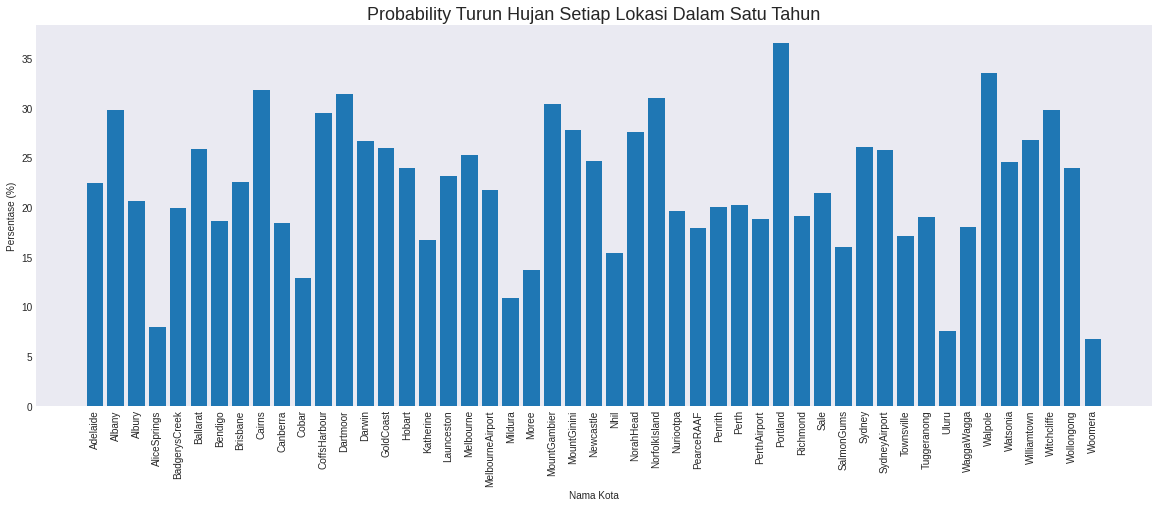

In [ ]:
#plot distribusi hujan pada tiap kota dalam setahun
plt.style.use('seaborn-dark')
plt.figure(figsize=(20, 7))
plt.bar(location_rain.index, location_rain.Rain_Probability)

x = range (49)
x_labels = location_rain.index

plt.title('Probability Turun Hujan Setiap Lokasi Dalam Satu Tahun', fontsize = 18)
plt.xlabel('Nama Kota')
plt.ylabel('Persentase (%)')
plt.xticks(x, x_labels, rotation='vertical')
plt.style.use('seaborn')
plt.show()

## 3. Bagaimana perubahan intensitas hujan dari tahun ke tahun

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


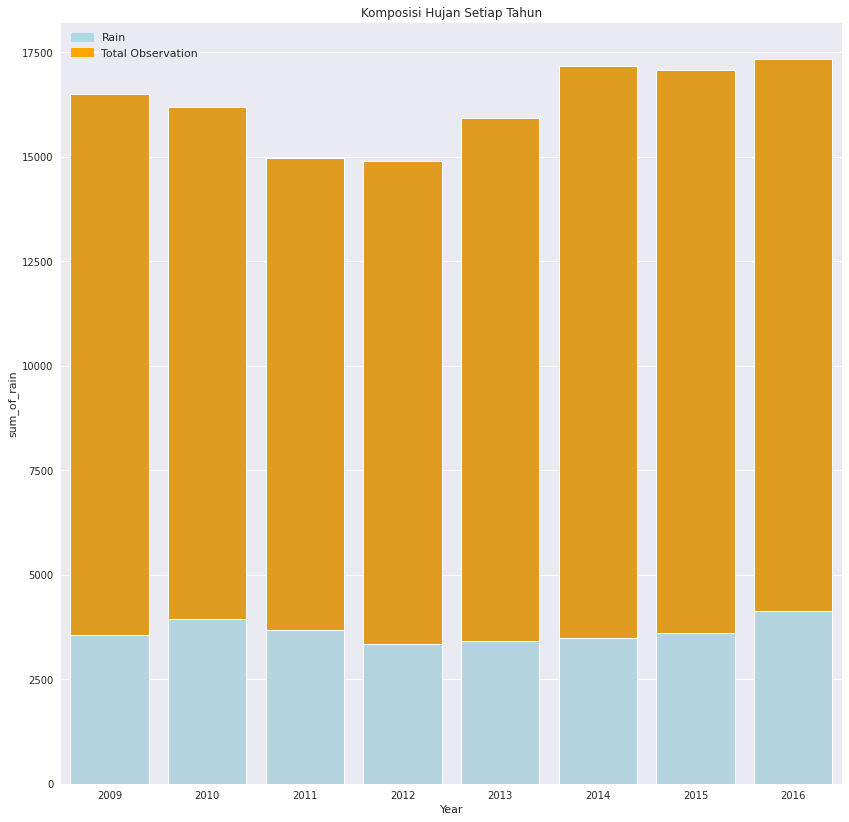

In [ ]:
plt.figure(figsize=(14, 14))
plt.title ('Komposisi Hujan Setiap Tahun')
plt.ylabel ('Jumlah')
plt.xlabel ('Tahun')
sns.set(style="whitegrid")

yearly_rain = df1.groupby('Year').agg(sum_of_rain = ('RainToday_N', 'sum'),
                                        count_of_total = ('RainToday_N', 'count'))
yearly_rain['Rain_Probability'] = yearly_rain['sum_of_rain'] / yearly_rain['count_of_total'] *100
yearly = yearly_rain.drop([2007, 2008, 2017])

bar1 = sns.barplot(yearly.index, yearly.count_of_total, color = 'orange')
bar2 = sns.barplot(yearly.index, yearly.sum_of_rain,estimator=sum, ci=None, color = 'lightblue')
# line = sns.lineplot(yearly.index, yearly.Rain_Probability, color = 'blue')
#Add Legend
import matplotlib.patches as mpatches
top_bar = mpatches.Patch(color='lightblue', label='Rain')
bottom_bar = mpatches.Patch(color='orange', label='Total Observation')
plt.legend(handles = [top_bar, bottom_bar])
plt.show()

In [ ]:
yearly

sum_of_rain  count_of_total  Rain_Probability
Year                                               
2009       3566.0           16514         21.593799
2010       3953.0           16191         24.414798
2011       3691.0           14983         24.634586
2012       3340.0           14894         22.425138
2013       3410.0           15935         21.399435
2014       3496.0           17181         20.348059
2015       3604.0           17089         21.089590
2016       4124.0           17341         23.781789

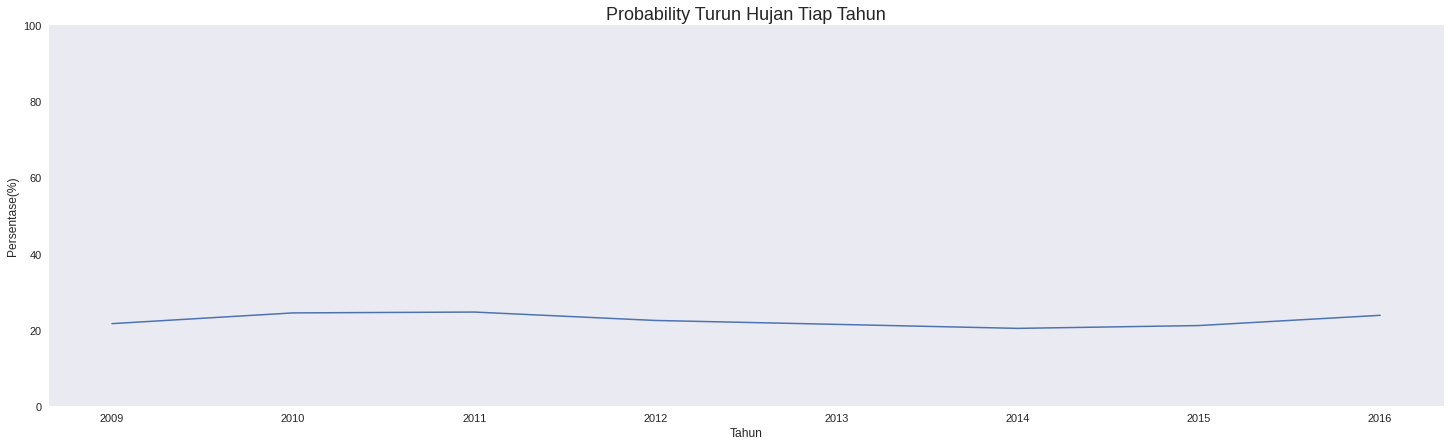

In [ ]:
# Plot distribusi peluang turunnya hujan setiap tahun
plt.style.use('seaborn-dark')
plt.figure(figsize=(25, 7))
plt.plot(yearly.index, yearly.Rain_Probability)
plt.title('Probability Turun Hujan Tiap Tahun', fontsize= 18)
plt.ylim(0, 100)
plt.xlabel('Tahun')
plt.ylabel('Persentase(%)')
# plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017 ] , rotation = 20)

plt.show()

**Tidak ada perubahan** yang signifikan dari tahun ke tahun


## 4. Bagaimana distribusi data dari masing-masing kolumn terhadap hujan/tidak hujan?

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Jumlah Observasi Pada Setiap Kota

Rata-Rata Jumlah Observasi Tiap Kota adalah:  2873.204081632653


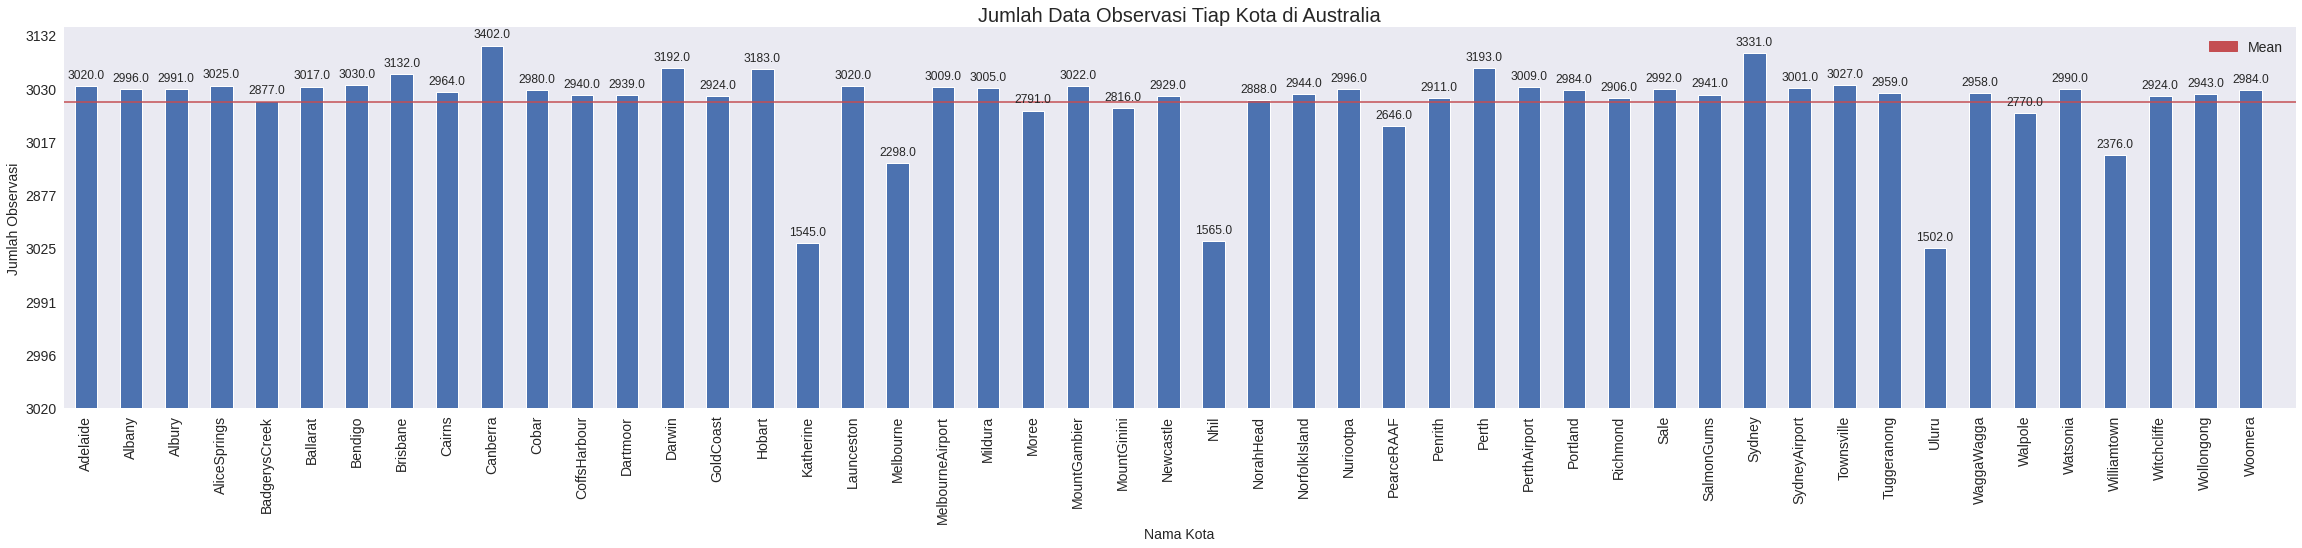

In [ ]:
print('Rata-Rata Jumlah Observasi Tiap Kota adalah: ', location_rain.count_of_total.mean())
# Jumlah data yang terkumpul berdasarkan kota
plt.figure(figsize = (40, 7))

ax = location_rain.count_of_total.plot(kind="bar")
plt.axhline(y= location_rain.count_of_total.mean(),  color='r', linestyle='-')
# bar1 = plt.bar(location_rain.index, location_rain.count_of_total)

plt.style.use('seaborn-dark')
plt.title('Jumlah Data Observasi Tiap Kota di Australia', fontsize = 20)
plt.xlabel('Nama Kota', fontsize = 14)
plt.ylabel('Jumlah Observasi', fontsize = 14)
plt.xticks(range(50), location_rain.index , rotation='vertical', fontsize = 14)
ax.set_xticklabels(location_rain.index)
ax.set_yticklabels(location_rain.count_of_total, fontsize = 14)
# rects = bar1.patches
# labels = [f"label{i}" for i in range(len(rects))]
# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     bar1.text(
#         rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
#     )

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

add_value_labels(ax)

mean_line = mpatches.Patch(color='r', label = 'Mean')

plt.legend(handles = [mean_line], fontsize = 14)

plt.show()


Rata-rata jumlah observasi tiap kota adalah 2902 observasi. Ada 9 kota yang memiliki jumlah observasi dibawah rata-rata yaitu **Katherine, Melbourne, Moree, Mount Ginini, Nhil, PearceRAAF, Uluru, Walpole, Wiliamtown**.

### Distribusi dari masing-masing kolom numerik

In [ ]:
df1.head()

Date Location  MinTemp  ...  Year  RainToday_N  RainTomorrow_N
0 2008-12-01   Albury     13.4  ...  2008          0.0             0.0
1 2008-12-02   Albury      7.4  ...  2008          0.0             0.0
2 2008-12-03   Albury     12.9  ...  2008          0.0             0.0
3 2008-12-04   Albury      9.2  ...  2008          0.0             0.0
4 2008-12-05   Albury     17.5  ...  2008          0.0             0.0

[5 rows x 28 columns]

In [ ]:
# Selecting only numeric dytpe columns
numeric = df1.select_dtypes(include='number')
numeric['RainToday'] = df1['RainToday']
numeric = numeric.drop('Year', axis = 1)
numeric = numeric.drop('RainToday_N', axis = 1)
numeric = numeric.drop('RainTomorrow_N', axis = 1)
numeric

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


MinTemp  MaxTemp  Rainfall  ...  Temp9am  Temp3pm  RainToday
0          13.4     22.9       0.6  ...     16.9     21.8         No
1           7.4     25.1       0.0  ...     17.2     24.3         No
2          12.9     25.7       0.0  ...     21.0     23.2         No
3           9.2     28.0       0.0  ...     18.1     26.5         No
4          17.5     32.3       1.0  ...     17.8     29.7         No
...         ...      ...       ...  ...      ...      ...        ...
145454      3.5     21.8       0.0  ...      9.4     20.9         No
145455      2.8     23.4       0.0  ...     10.1     22.4         No
145456      3.6     25.3       0.0  ...     10.9     24.5         No
145457      5.4     26.9       0.0  ...     12.5     26.1         No
145458      7.8     27.0       0.0  ...     15.1     26.0         No

[142193 rows x 17 columns]

In [ ]:
# Plot all 9 am numeric columns
numeric9am = numeric[['WindSpeed9am', 'Humidity9am', 'Pressure9am', 'Cloud9am', 'Temp9am', 'RainToday']]
numeric3pm = numeric[['WindSpeed3pm', 'Humidity3pm', 'Pressure3pm', 'Cloud3pm', 'Temp3pm', 'RainToday']]
numeric1 = numeric[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'RainToday']]

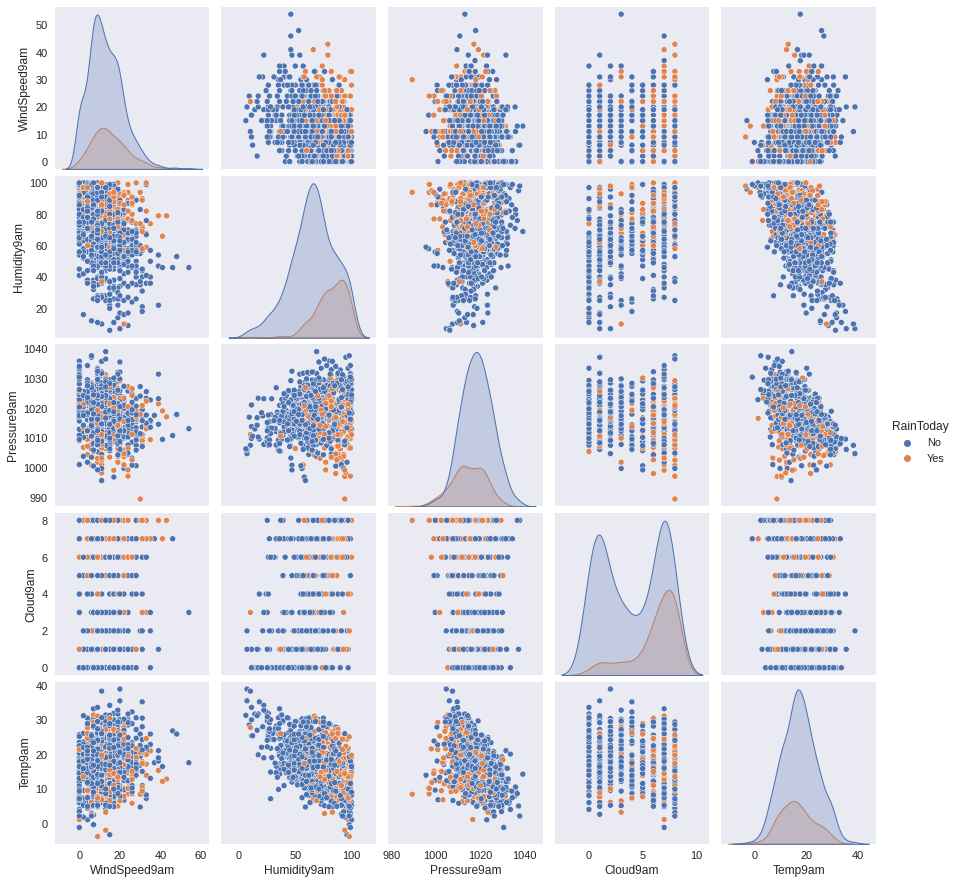

In [ ]:
sns.pairplot(numeric9am.sample(n = 1000, random_state= 123, replace = True), hue = 'RainToday')
plt.show()

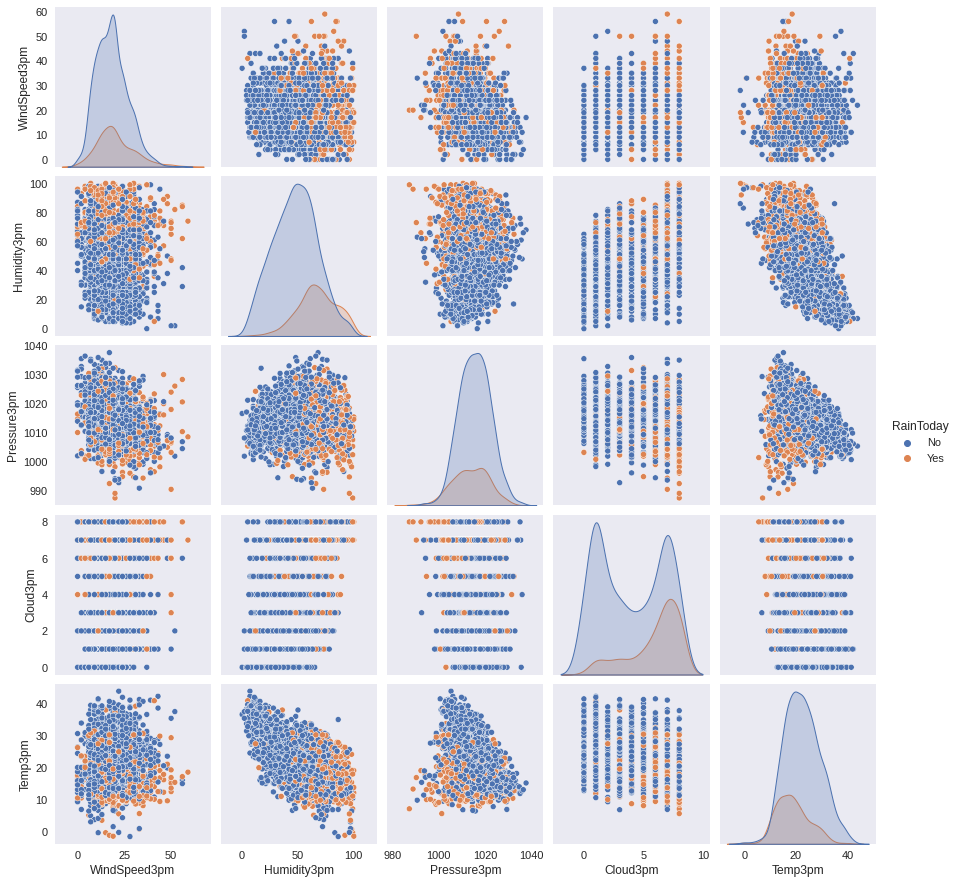

In [ ]:
sns.pairplot(numeric3pm.sample(n = 3000, random_state= 123, replace = True), hue = 'RainToday')
plt.show()

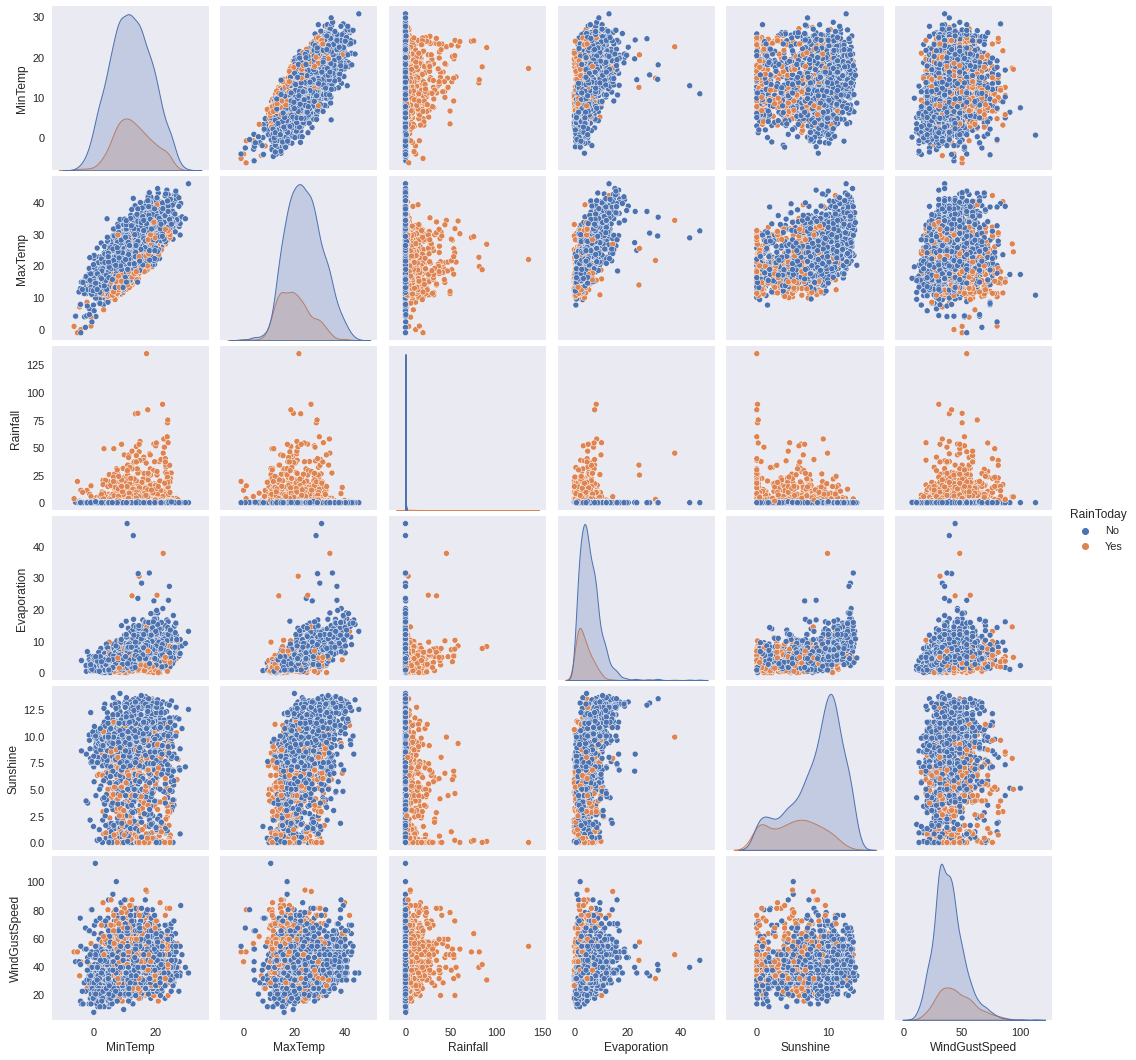

In [ ]:
sns.pairplot(numeric1.sample(n = 3000, random_state= 123, replace = True), hue = 'RainToday')
plt.show()

## 5. Bagaimana korelasi antara fitur numerik?

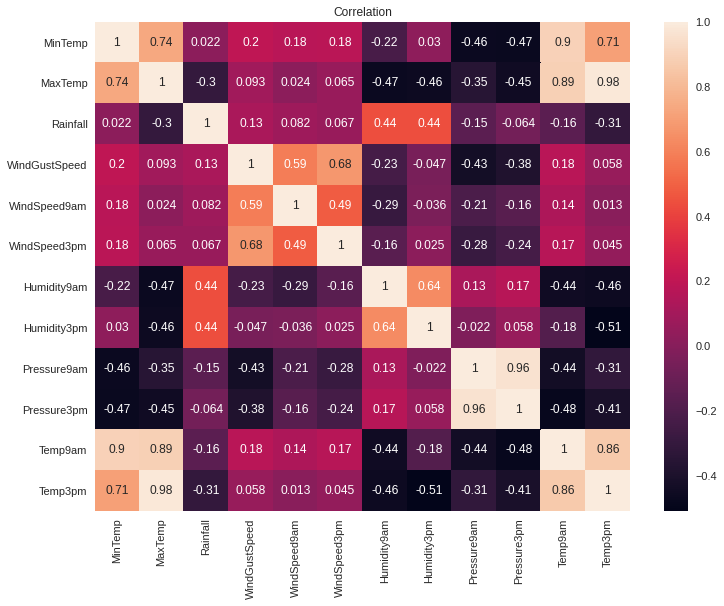

In [ ]:
data_corr = df1[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']].corr(method='spearman')

plt.style.use('seaborn-dark')
plt.figure(figsize=(12, 9))
plt.title('Correlation')
sns.heatmap(data_corr, annot=True)
plt.show()

## 6. Berapa persen jumlah mising value dari masing-masing feature?

### Categorical Features

In [ ]:
categorical = df1.select_dtypes('object').columns.to_list()
df1[categorical].isnull().mean()*100

Location        0.000000
WindGustDir     6.561504
WindDir9am      7.041838
WindDir3pm      2.656952
RainToday       0.988797
RainTomorrow    0.000000
Day             0.000000
Month           0.000000
dtype: float64

All the missing values of categorical features are less than 10%. Imputing these missing values with **the mode** is considered to be a proper way.

### Numerical Features

In [ ]:
# Missing values for numeric data
numeric_col = df1.describe().columns.to_list()
df1[numeric_col].isnull().mean()*100

MinTemp            0.447983
MaxTemp            0.226453
Rainfall           0.988797
Evaporation       42.789026
Sunshine          47.692924
WindGustSpeed      6.519308
WindSpeed9am       0.948007
WindSpeed3pm       1.849599
Humidity9am        1.247600
Humidity3pm        2.538803
Pressure9am        9.855619
Pressure3pm        9.832411
Cloud9am          37.735332
Cloud3pm          40.152469
Temp9am            0.635756
Temp3pm            1.917113
Year               0.000000
RainToday_N        0.988797
RainTomorrow_N     0.000000
dtype: float64

There are 4 features that has significant missing values percentage, which is **Sunshine, Evaporation, Cloud3pm, and Cloud9am**. So we should to dig deeper at those 4 features

In [ ]:
# # Let's explore the features having high missing values
# cols = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']

# plt.style.use('seaborn-dark')
# fig, ax = plt.subplots(4,2, figsize = (12, 8), constrained_layout = True)

# for i, num_var in enumerate(cols): 
#     sns.kdeplot(data = df1, x = num_var, ax = ax[i][0],
#                 fill = True, alpha = 0.6, linewidth = 1.5)
#     ax[i][0].set_ylabel(num_var)
#     ax[i][0].set_xlabel(None)
    
#     sns.histplot(data = df1, x = num_var, ax = ax[i][1])
#     ax[i][1].set_ylabel(None)
#     ax[i][1].set_xlabel(None)
    
# fig.suptitle('Features having high missing values (>35%)', size = 18);

## 7. Bagaimana perbandingan antara RainTomorrow = Yes dan RainTomorrow = No?

Missing values is dropped because **RainTomorrow is the target and it is could not be imputed.**

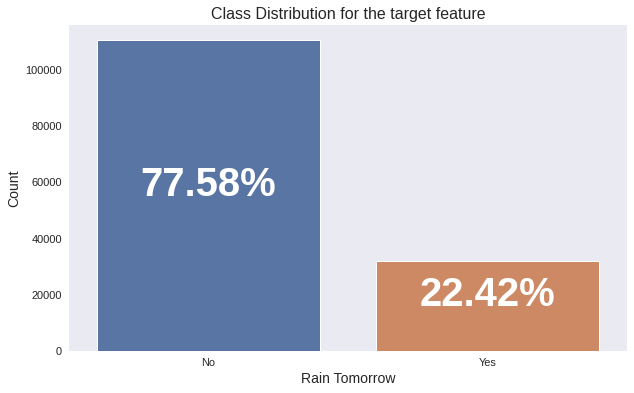

In [ ]:
# Checking for the class imbalance
plt.style.use('seaborn-dark')
fig = plt.figure(figsize = (10, 6))
axis = sns.countplot(x = 'RainTomorrow', data = df1);
axis.set_title('Class Distribution for the target feature', size = 16);

for patch in axis.patches:
    axis.text(x = patch.get_x() + patch.get_width()/2, y = patch.get_height()/2, 
            s = f"{np.round(patch.get_height()/len(df1)*100, 2)}%", 
            ha = 'center', size = 40, rotation = 0, weight = 'bold' ,color = 'white')
    
axis.set_xlabel('Rain Tomorrow', size = 14)
axis.set_ylabel('Count', size = 14);

# Preprocessing

## Removing Outliers


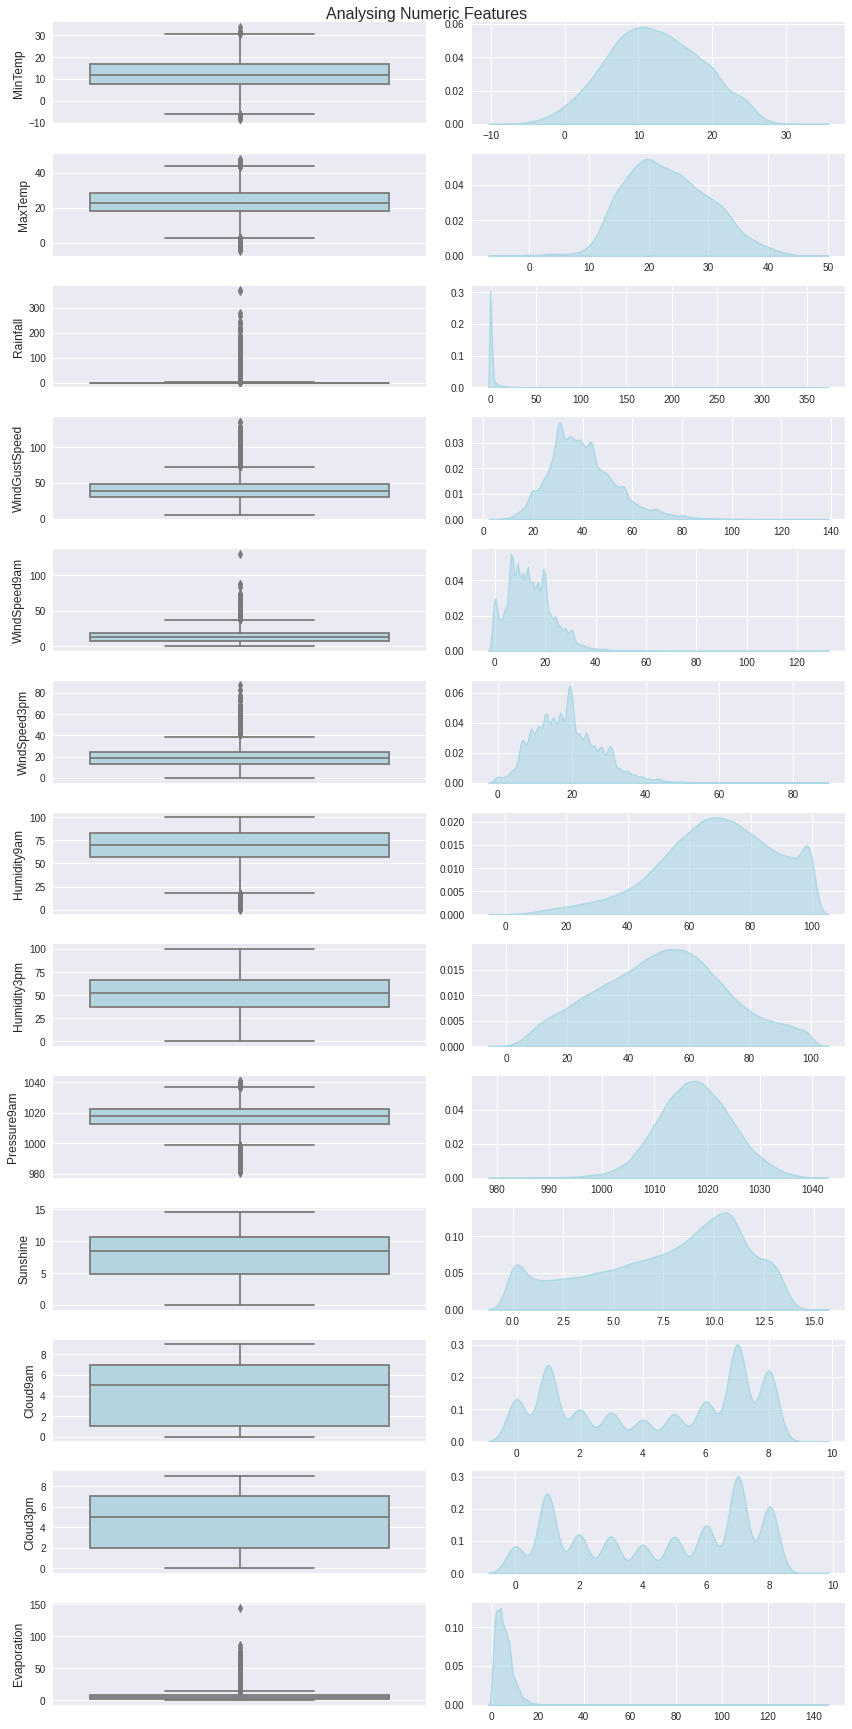

In [ ]:
# Let's look at the outliers and the distribution of the numeric features

numeric_col = ['MinTemp', 'MaxTemp', 'Rainfall','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
               'Humidity9am','Humidity3pm', 'Pressure9am', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Evaporation']

plt.style.use('seaborn')
fig, axis = plt.subplots(13, 2, figsize = (12, 24))
for i, num_var in enumerate(numeric_col):
    
    # Checking for the outliers using boxplot
    sns.boxplot(y = num_var, data = df1, ax = axis[i][0], color = 'lightblue')
    
    # Checking for the distribution using kdeplot
    sns.kdeplot(x = num_var, data = df1, ax = axis[i][1], color = 'lightblue',
               fill = True, alpha = 0.6, linewidth = 1.5)
    
    axis[i][0].set_ylabel(f"{num_var}", fontsize = 12)
    axis[i][0].set_xlabel(None)
    axis[i][1].set_xlabel(None)
    axis[i][1].set_ylabel(None)

fig.suptitle('Analysing Numeric Features', fontsize = 16, y = 1)
plt.tight_layout()

## Removing Multicollinearity

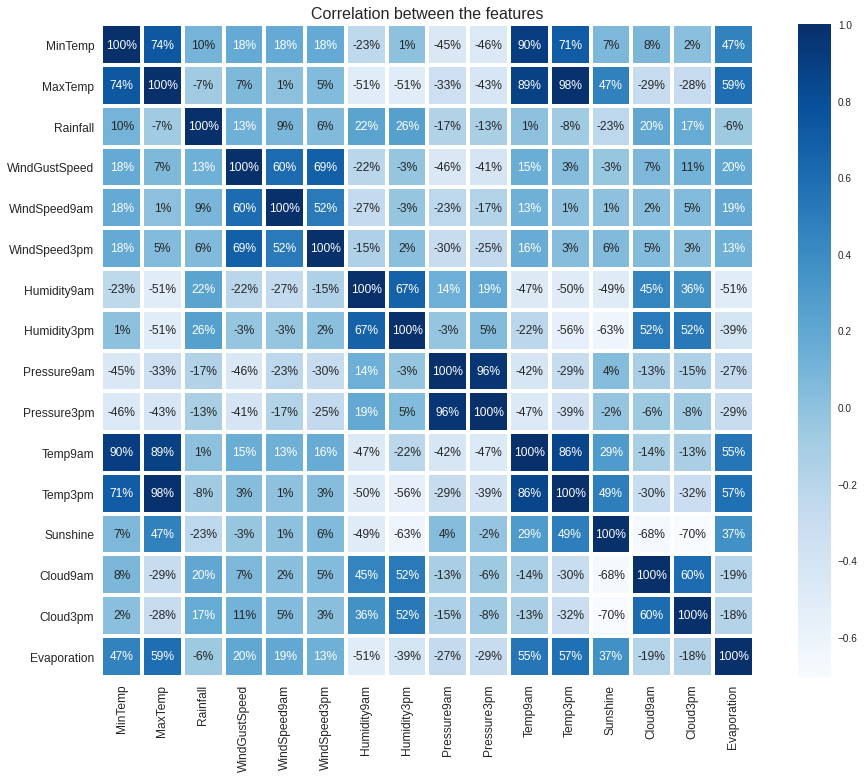

In [ ]:
# Checking for the correlation between the numeric features
# Correlation between numeric variables

numeric_col = ['MinTemp', 'MaxTemp', 'Rainfall','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
               'Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm',
              'Sunshine', 'Cloud9am', 'Cloud3pm', 'Evaporation']

fig=plt.figure(figsize=(16,12))
axis=sns.heatmap(df1[numeric_col].corr(), annot=True, linewidths=3, square=True, cmap='Blues', fmt=".0%")

axis.set_title('Correlation between the features', fontsize=16);
axis.set_xticklabels(numeric_col, fontsize=12)
axis.set_yticklabels(numeric_col, fontsize=12, rotation=0);

**Strong correlation between**
Temp3pm and MaxTemp

Pressure3pm and Pressure9am

Temp9am and MinTemp

Temp9am and MaxTemp

Temp3pm and Temp9am

We will remove one of the features in each pair, to avoid multicollinearity

- Temp9am and Temp3pm will be **dropped**
- MaxTemp and MinTemp will be combined into new variable named **AvgTemp** which equals to (MaxTemp+MinTemp)/2
- Pressure9am and Pressure3pm will be combined into new variable named **AvgPressure** which equals to (Pressure9am+Pressure3pm)/2

In [ ]:
# Droping the columns
drop = ['Temp3pm', 'Temp9am']
for x in df1.columns:
    if any(y in x for y in drop):
      df1 = df1.drop(x, axis = 1)
df1

Date Location  MinTemp  ...  Year  RainToday_N  RainTomorrow_N
0      2008-12-01   Albury     13.4  ...  2008          0.0             0.0
1      2008-12-02   Albury      7.4  ...  2008          0.0             0.0
2      2008-12-03   Albury     12.9  ...  2008          0.0             0.0
3      2008-12-04   Albury      9.2  ...  2008          0.0             0.0
4      2008-12-05   Albury     17.5  ...  2008          0.0             0.0
...           ...      ...      ...  ...   ...          ...             ...
145454 2017-06-20    Uluru      3.5  ...  2017          0.0             0.0
145455 2017-06-21    Uluru      2.8  ...  2017          0.0             0.0
145456 2017-06-22    Uluru      3.6  ...  2017          0.0             0.0
145457 2017-06-23    Uluru      5.4  ...  2017          0.0             0.0
145458 2017-06-24    Uluru      7.8  ...  2017          0.0             0.0

[142193 rows x 26 columns]

In [ ]:
df1['AvgTemp'] = (df1.MinTemp + df1.MaxTemp)/2
df1['AvgPressure'] = (df1.Pressure3pm + df1.Pressure9am)/2

drop = ['MinTemp', 'MaxTemp', 'Pressure3pm', 'Pressure9am', 'RainToday_N', 'RainTomorrow_N', 'Day', 'Month', 'Year']

for x in df1.columns:
  if any(y in x for y in drop):
      df1 = df1.drop(x, axis = 1)
df1

Date Location  Rainfall  ...  RainTomorrow  AvgTemp AvgPressure
0      2008-12-01   Albury       0.6  ...            No    18.15     1007.40
1      2008-12-02   Albury       0.0  ...            No    16.25     1009.20
2      2008-12-03   Albury       0.0  ...            No    19.30     1008.15
3      2008-12-04   Albury       0.0  ...            No    18.60     1015.20
4      2008-12-05   Albury       1.0  ...            No    24.90     1008.40
...           ...      ...       ...  ...           ...      ...         ...
145454 2017-06-20    Uluru       0.0  ...            No    12.65     1022.95
145455 2017-06-21    Uluru       0.0  ...            No    13.10     1022.45
145456 2017-06-22    Uluru       0.0  ...            No    14.45     1021.30
145457 2017-06-23    Uluru       0.0  ...            No    16.15     1018.90
145458 2017-06-24    Uluru       0.0  ...            No    17.40     1017.95

[142193 rows x 19 columns]

## Handling Missing Values

In [ ]:
df1.isnull().sum()

Date                 0
Location             0
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Cloud9am         53657
Cloud3pm         57094
RainToday         1406
RainTomorrow         0
AvgTemp            871
AvgPressure      14204
dtype: int64

- (1) Missing values in Rainfall, WindGustSpeed, WindSpeed9am, WindSpeed3pm, AvgPressure, AvgTemp, Evaporation, Humidity9am columns will be imputated with **median value**

- (2) Missing values in Sunshine, Cloud9am, Cloud3pm, Humidity3pm columns will be imputated with **mean value**

- (3) Missing values in WindDir9am, WindDir3pm, WindGustDir will be imputated with **mode value**

In [ ]:
# Filling Missing Values (1)
df1[['Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'AvgPressure', 'AvgTemp', 'Evaporation', 'Humidity9am']] = df1[['Rainfall', 
                                                                                                                                  'WindGustSpeed', 
                                                                                                                                  'WindSpeed9am', 
                                                                                                                                  'WindSpeed3pm', 
                                                                                                                                  'AvgPressure', 
                                                                                                                                  'AvgTemp', 
                                                                                                                                  'Evaporation', 
                                                                                                                                  'Humidity9am']].fillna(df1.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  if __name__ == '__main__':


In [ ]:
# Filling Missing Values (2)
df1[['Sunshine', 'Cloud9am', 'Cloud3pm', 'Humidity3pm']] = df1[['Sunshine', 'Cloud9am', 'Cloud3pm', 'Humidity3pm']].fillna(df1.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


In [ ]:
# Filling Missing Values (3)
cols = ['WindDir9am', 'WindDir3pm', 'WindGustDir', 'RainToday']
df1[cols]=df1[cols].fillna(df1.mode().iloc[0])

In [ ]:
df1['WindDir9am'].mode()

0    N
dtype: object

In [ ]:
#Check the Missing Values again
df1.isnull().sum()

Date             0
Location         0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Cloud9am         0
Cloud3pm         0
RainToday        0
RainTomorrow     0
AvgTemp          0
AvgPressure      0
dtype: int64

## Label Encoding Object Data

### Encoding Locations Data

Because of there are 49 locations, one hot encoding will produce 49 columns. To simplify the encoding, pivot table are used to encode the locations.

In [ ]:
# Encoding using pivot table
loc_label = df1.groupby('Location').agg( avg_AvgTemp = ('AvgTemp', 'mean'),
                             avg_AvgPressure = ('AvgPressure', 'mean'),
                             med_Sunshine = ('Sunshine', 'median'),
                             avg_Humidity3pm = ('Humidity3pm', 'mean')
                             )
loc_label.duplicated()

Location
Adelaide            False
Albany              False
Albury              False
AliceSprings        False
BadgerysCreek       False
Ballarat            False
Bendigo             False
Brisbane            False
Cairns              False
Canberra            False
Cobar               False
CoffsHarbour        False
Dartmoor            False
Darwin              False
GoldCoast           False
Hobart              False
Katherine           False
Launceston          False
Melbourne           False
MelbourneAirport    False
Mildura             False
Moree               False
MountGambier        False
MountGinini         False
Newcastle           False
Nhil                False
NorahHead           False
NorfolkIsland       False
Nuriootpa           False
PearceRAAF          False
Penrith             False
Perth               False
PerthAirport        False
Portland            False
Richmond            False
Sale                False
SalmonGums          False
Sydney              False
Syd

In [ ]:
df2 = df1.merge(loc_label, how = 'left', on = 'Location')
df2

Date Location  ...  med_Sunshine  avg_Humidity3pm
0      2008-12-01   Albury  ...      7.624853        47.889715
1      2008-12-02   Albury  ...      7.624853        47.889715
2      2008-12-03   Albury  ...      7.624853        47.889715
3      2008-12-04   Albury  ...      7.624853        47.889715
4      2008-12-05   Albury  ...      7.624853        47.889715
...           ...      ...  ...           ...              ...
142188 2017-06-20    Uluru  ...      7.624853        23.958240
142189 2017-06-21    Uluru  ...      7.624853        23.958240
142190 2017-06-22    Uluru  ...      7.624853        23.958240
142191 2017-06-23    Uluru  ...      7.624853        23.958240
142192 2017-06-24    Uluru  ...      7.624853        23.958240

[142193 rows x 23 columns]

### Encoding Date (day) Data

In [ ]:
df2['Day'] = df2.Date.dt.strftime('%j')

day_label = df2.groupby('Day').agg( max_AvgTemp = ('AvgTemp', 'max'),
                                    min_AvgTemp = ('AvgTemp', 'min'),
                                    mean_Sunshine = ('Sunshine', 'mean'),
                                    mean_WindGustSpeed = ('WindGustSpeed', 'mean'))

duplicates = day_label[day_label.duplicated()]
duplicates                              

Empty DataFrame
Columns: [max_AvgTemp, min_AvgTemp, mean_Sunshine, mean_WindGustSpeed]
Index: []

In [ ]:
df2 = df2.merge(day_label, how = 'left', on = 'Day')
df2

Date Location  ...  mean_Sunshine  mean_WindGustSpeed
0      2008-12-01   Albury  ...       8.812714           42.238636
1      2008-12-02   Albury  ...       8.523929           42.897143
2      2008-12-03   Albury  ...       8.343840           42.848138
3      2008-12-04   Albury  ...       7.984754           43.942197
4      2008-12-05   Albury  ...       7.993859           41.442197
...           ...      ...  ...            ...                 ...
142188 2017-06-20    Uluru  ...       6.678379           36.538095
142189 2017-06-21    Uluru  ...       6.665427           36.427553
142190 2017-06-22    Uluru  ...       6.588074           37.419811
142191 2017-06-23    Uluru  ...       6.585106           39.128571
142192 2017-06-24    Uluru  ...       6.805094           38.254157

[142193 rows x 28 columns]

In [ ]:
drop = ['Date', 'Day', 'Location','WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

for x in df2.columns:
  if any(y in x for y in drop):
    df2 = df2.drop(x , axis = 1)
df2 = df2.reset_index(drop= True)
df2


Rainfall  Evaporation  ...  mean_Sunshine  mean_WindGustSpeed
0            0.6          4.8  ...       8.812714           42.238636
1            0.0          4.8  ...       8.523929           42.897143
2            0.0          4.8  ...       8.343840           42.848138
3            0.0          4.8  ...       7.984754           43.942197
4            1.0          4.8  ...       7.993859           41.442197
...          ...          ...  ...            ...                 ...
142188       0.0          4.8  ...       6.678379           36.538095
142189       0.0          4.8  ...       6.665427           36.427553
142190       0.0          4.8  ...       6.588074           37.419811
142191       0.0          4.8  ...       6.585106           39.128571
142192       0.0          4.8  ...       6.805094           38.254157

[142193 rows x 20 columns]

In [ ]:
# Check Unique Values of Columns
pd.unique(df1[['WindGustDir', 'WindDir9am', 'WindDir3pm']].values.ravel('K'))

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

### Label Encoding RainToday and RainTomorrow


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = df1[['RainToday', 'RainTomorrow']].apply(LabelEncoder().fit_transform)
le = le.reset_index(drop= True)

In [ ]:
df2 = pd.concat([df2, le], axis = 1)

In [ ]:
df2.isnull().sum()

Rainfall              0
Evaporation           0
Sunshine              0
WindGustSpeed         0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Cloud9am              0
Cloud3pm              0
AvgTemp               0
AvgPressure           0
avg_AvgTemp           0
avg_AvgPressure       0
med_Sunshine          0
avg_Humidity3pm       0
max_AvgTemp           0
min_AvgTemp           0
mean_Sunshine         0
mean_WindGustSpeed    0
RainToday             0
RainTomorrow          0
dtype: int64

### One-Hot Encoding

In [ ]:
cat = df1.select_dtypes('object')

for x in cat:
  print(x, df1[x].unique())

Location ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
WindGustDir ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
WindDir9am ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
WindDir3pm ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
RainToday ['No' 'Yes']
RainTomorrow ['No' 'Yes']


In [ ]:
category = df1[['WindGustDir', 'WindDir9am', 'WindDir3pm']]

In [ ]:
one_hot = pd.get_dummies(category)
one_hot.isnull().sum()

WindGustDir_E      0
WindGustDir_ENE    0
WindGustDir_ESE    0
WindGustDir_N      0
WindGustDir_NE     0
WindGustDir_NNE    0
WindGustDir_NNW    0
WindGustDir_NW     0
WindGustDir_S      0
WindGustDir_SE     0
WindGustDir_SSE    0
WindGustDir_SSW    0
WindGustDir_SW     0
WindGustDir_W      0
WindGustDir_WNW    0
WindGustDir_WSW    0
WindDir9am_E       0
WindDir9am_ENE     0
WindDir9am_ESE     0
WindDir9am_N       0
WindDir9am_NE      0
WindDir9am_NNE     0
WindDir9am_NNW     0
WindDir9am_NW      0
WindDir9am_S       0
WindDir9am_SE      0
WindDir9am_SSE     0
WindDir9am_SSW     0
WindDir9am_SW      0
WindDir9am_W       0
WindDir9am_WNW     0
WindDir9am_WSW     0
WindDir3pm_E       0
WindDir3pm_ENE     0
WindDir3pm_ESE     0
WindDir3pm_N       0
WindDir3pm_NE      0
WindDir3pm_NNE     0
WindDir3pm_NNW     0
WindDir3pm_NW      0
WindDir3pm_S       0
WindDir3pm_SE      0
WindDir3pm_SSE     0
WindDir3pm_SSW     0
WindDir3pm_SW      0
WindDir3pm_W       0
WindDir3pm_WNW     0
WindDir3pm_WS

In [ ]:
one_hot = one_hot.reset_index(drop = True)

In [ ]:
df2 = df2.merge(one_hot, how = 'left', left_index= True, right_index=True)
df2

Rainfall  Evaporation  ...  WindDir3pm_WNW  WindDir3pm_WSW
0            0.6          4.8  ...               1               0
1            0.0          4.8  ...               0               1
2            0.0          4.8  ...               0               1
3            0.0          4.8  ...               0               0
4            1.0          4.8  ...               0               0
...          ...          ...  ...             ...             ...
142188       0.0          4.8  ...               0               0
142189       0.0          4.8  ...               0               0
142190       0.0          4.8  ...               0               0
142191       0.0          4.8  ...               1               0
142192       0.0          4.8  ...               0               0

[142193 rows x 70 columns]

### Final Data Frame

In [ ]:
df2.isnull().sum()

Rainfall          0
Evaporation       0
Sunshine          0
WindGustSpeed     0
WindSpeed9am      0
                 ..
WindDir3pm_SSW    0
WindDir3pm_SW     0
WindDir3pm_W      0
WindDir3pm_WNW    0
WindDir3pm_WSW    0
Length: 70, dtype: int64

In [ ]:
# Creating Target and Features
df_X = df2.drop('RainTomorrow', axis = 1) # Features
df_y = df2['RainTomorrow'] # Target

# Model Development

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [ ]:
# Splitting data train and data test

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=123)

In [ ]:
# Balance Check
y_train.value_counts()

0    77199
1    22336
Name: RainTomorrow, dtype: int64

In [ ]:
pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
np.unique(y_smote, return_counts= True)

(array([0, 1]), array([77199, 77199]))

## KNN Classifier

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaler_tr = scaler.fit_transform(X_smote)
X_scaler_tr = pd.DataFrame(X_scaler_tr,columns = X_train.columns)
X_scaler_ts = scaler.fit_transform(X_test)
X_scaler_ts = pd.DataFrame(X_scaler_ts, columns = X_train.columns)

In [ ]:
X_scaler_tr

Rainfall  Evaporation  ...  WindDir3pm_WNW  WindDir3pm_WSW
0       0.016173     0.023448  ...        0.000000             0.0
1       0.052291     0.022069  ...        0.000000             0.0
2       0.000000     0.005517  ...        0.000000             0.0
3       0.000000     0.033103  ...        0.000000             0.0
4       0.000000     0.033103  ...        0.000000             0.0
...          ...          ...  ...             ...             ...
154393  0.001558     0.015172  ...        0.000000             0.0
154394  0.000000     0.121212  ...        0.000000             0.0
154395  0.000491     0.017685  ...        0.000000             0.0
154396  0.000000     0.033103  ...        0.744432             0.0
154397  0.028585     0.028267  ...        0.000000             0.0

[154398 rows x 69 columns]

In [ ]:
X_scaler_ts

Rainfall  Evaporation  ...  WindDir3pm_WNW  WindDir3pm_WSW
0      0.000000     0.062096  ...             0.0             0.0
1      0.000000     0.062096  ...             0.0             0.0
2      0.000000     0.142303  ...             0.0             0.0
3      0.000000     0.062096  ...             0.0             0.0
4      0.000000     0.062096  ...             0.0             0.0
...         ...          ...  ...             ...             ...
42653  0.000000     0.062096  ...             0.0             0.0
42654  0.161579     0.062096  ...             0.0             0.0
42655  0.000000     0.041397  ...             0.0             0.0
42656  0.016381     0.010349  ...             0.0             0.0
42657  0.000000     0.046572  ...             0.0             0.0

[42658 rows x 69 columns]

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier(n_jobs = -1)
# model.fit(X_scaler_tr, y_train)
# y_pred = model.predict(X_scaler_ts)

# print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
# print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
# print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
# print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
# plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
# plt.show()

## Decision Tree Classifier

Accuracy  0.7959585540812978
Precision  0.7176636678903814
Recall  0.7562917893253407
Confusion matrix  [[27423  5694]
 [ 3010  6531]]


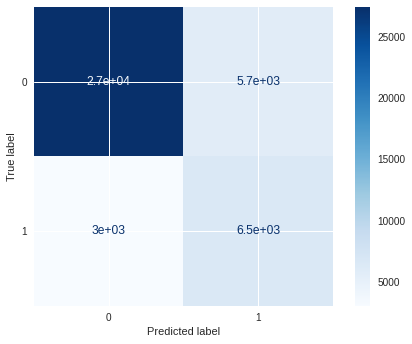

In [ ]:
dtc = DecisionTreeClassifier(random_state=42, max_depth= 8)
dtc.fit(X_smote, y_smote)
y_pred = dtc.predict(X_test)

dtc.score(X_smote, y_smote)
acc_dtc_train = round(dtc.score(X_smote, y_smote) * 100, 2)

acc_dtc_scr = metrics.accuracy_score(y_test, y_pred)
prc_dtc_scr = metrics.precision_score(y_test, y_pred, average='macro')
rcl_dtc_scr = metrics.recall_score(y_test, y_pred, average='macro') 

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(dtc, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## Extra Tree Classifier

Accuracy  0.5405551127572789
Precision  0.5815844920441691
Recall  0.6150790641535022
Confusion matrix  [[15904 17213]
 [ 2386  7155]]


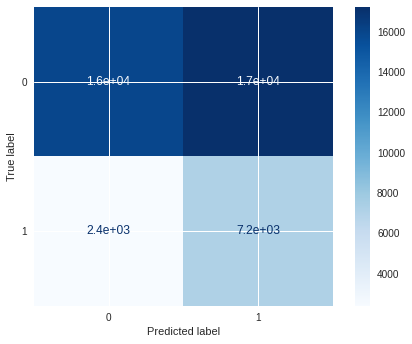

In [ ]:
etc = ExtraTreeClassifier(random_state=42, max_depth=7)
etc.fit(X_smote, y_smote)
y_pred = etc.predict(X_test)

etc.score(X_smote, y_smote)
acc_etc_train = round(etc.score(X_smote, y_smote) * 100, 2)

acc_etc_scr = metrics.accuracy_score(y_test, y_pred)
prc_etc_scr = metrics.precision_score(y_test, y_pred, average='macro')
rcl_etc_scr = metrics.recall_score(y_test, y_pred, average='macro') 

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(etc, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## Random Forest Classifier

Accuracy  0.8561113976276431
Precision  0.8036298400020552
Recall  0.7580615657096582
Confusion matrix  [[30980  2137]
 [ 4001  5540]]


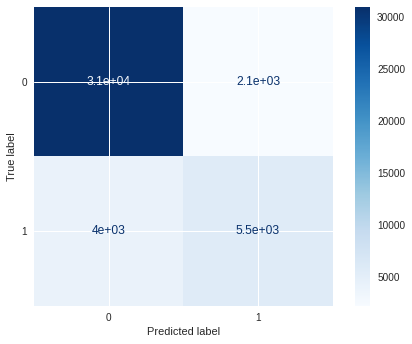

In [ ]:
rfc = RandomForestClassifier(n_estimators= 100, random_state=42)
rfc.fit(X_smote, y_smote)
y_pred = rfc.predict(X_test)

rfc.score(X_smote, y_smote)
acc_rfc_train = round(rfc.score(X_smote, y_smote) * 100, 2)

acc_rfc_scr = metrics.accuracy_score(y_test, y_pred)
prc_rfc_scr = metrics.precision_score(y_test, y_pred, average='macro')
rcl_rfc_scr = metrics.recall_score(y_test, y_pred, average='macro') 

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(rfc, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## AdaBoostClassifier

Accuracy  0.811993061090534
Precision  0.7309673948763415
Recall  0.7446074325379786
Confusion matrix  [[28697  4420]
 [ 3600  5941]]


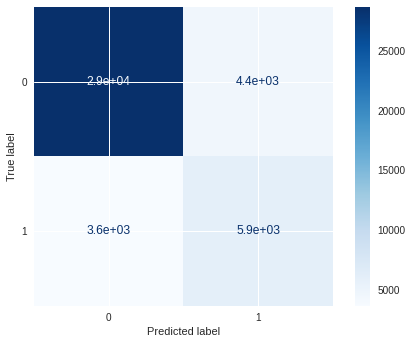

In [ ]:
abc = AdaBoostClassifier(random_state=42)
abc.fit(X_smote, y_smote)
y_pred = abc.predict(X_test)

abc.score(X_smote, y_smote)
acc_abc_train = round(abc.score(X_smote, y_smote) * 100, 2)

acc_abc_scr = metrics.accuracy_score(y_test, y_pred)
prc_abc_scr = metrics.precision_score(y_test, y_pred, average='macro')
rcl_abc_scr = metrics.recall_score(y_test, y_pred, average='macro') 

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(abc, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.5970254245804442

## Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy  0.7841905387031741
Precision  0.7159878930125949
Recall  0.7762827854758305
Confusion matrix  [[26182  6935]
 [ 2271  7270]]


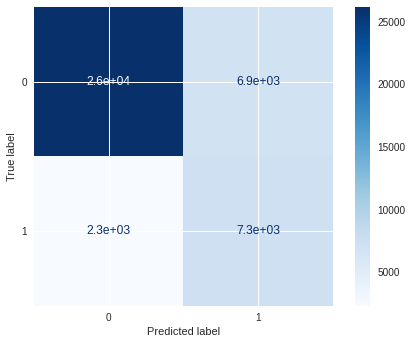

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_smote, y_smote)
y_pred = logreg.predict(X_test)

logreg.score(X_smote, y_smote)
acc_logreg_train = round(logreg.score(X_smote, y_smote) * 100, 2)

acc_logreg_scr = metrics.accuracy_score(y_test, y_pred)
prc_logreg_scr = metrics.precision_score(y_test, y_pred, average='macro')
rcl_logreg_scr = metrics.recall_score(y_test, y_pred, average='macro') 

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## Support Vector Machine Classifier (Linear SVC)

Because distance between data is critical to determine the support vector, we need to apply the scalar standardization on the features.

Accuracy  0.7839326738243706
Precision  0.7180538245089585
Recall  0.7821232026224371
Confusion matrix  [[26010  7107]
 [ 2110  7431]]


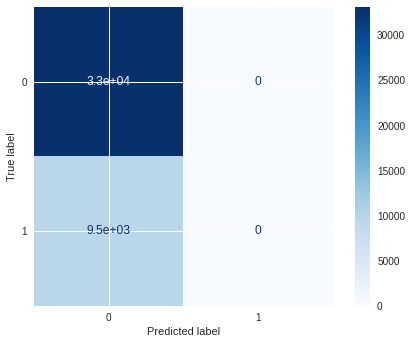

In [ ]:
from sklearn import svm
from sklearn.svm import LinearSVC

lsvc = LinearSVC()
lsvc.fit(X_scaler_tr, y_smote)
y_pred = lsvc.predict(X_scaler_ts)

lsvc.score(X_smote, y_smote)
acc_lsvc_train = round(lsvc.score(X_smote, y_smote) * 100, 2)

acc_lsvc_scr = metrics.accuracy_score(y_test, y_pred)
prc_lsvc_scr = metrics.precision_score(y_test, y_pred, average='macro')
rcl_lsvc_scr = metrics.recall_score(y_test, y_pred, average='macro') 

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(lsvc, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## Support Vector Machine Classifier

In [ ]:
from sklearn import svm

svm = svm.SVC()
svm.fit(X_scaler_tr, y_smote)
y_pred = svm.predict(X_scaler_ts)

svm.score(X_smote, y_smote)
acc_svm_train = round(svm.score(X_smote, y_smote) * 100, 2)

acc_svm_scr = metrics.accuracy_score(y_test, y_pred)
prc_svm_scr = metrics.precision_score(y_test, y_pred, average='macro')
rcl_svm_scr = metrics.recall_score(y_test, y_pred, average='macro') 

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(svm, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

KeyboardInterrupt: ignored

## Model Comparison

In [ ]:
results = pd.DataFrame({
    'Model': ['Decision Tree Classifier', 'Extra Tree Classifier', 'Random Forest Classifier', 'AdaBoostClassifier',
              'Logistic Regression', 'Linear SVC'],
    'Training_Score': [acc_dtc_train, acc_etc_train, acc_rfc_train, acc_abc_train,
                       acc_logreg_train, acc_lsvc_train],
    'Accuracy_Score': [acc_dtc_scr, acc_etc_scr, acc_rfc_scr, acc_abc_scr,
                       acc_logreg_scr, acc_lsvc_scr],
    'Precision_Score': [prc_dtc_scr, prc_etc_scr, prc_rfc_scr, prc_abc_scr,
                       prc_logreg_scr, prc_lsvc_scr],
    'Recall_Score': [rcl_dtc_scr, rcl_etc_scr, rcl_rfc_scr, rcl_abc_scr,
                    rcl_logreg_scr, rcl_lsvc_scr]})
result_df = results.sort_values(by='Accuracy_Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head()

Training_Score  ...  Recall_Score
Model                                     ...              
Random Forest Classifier          100.00  ...      0.758062
AdaBoostClassifier                 85.76  ...      0.744607
Decision Tree Classifier           82.55  ...      0.756292
Logistic Regression                77.62  ...      0.776283
Linear SVC                         50.00  ...      0.782123

[5 rows x 4 columns]

According to the comparison of four different evaluation scores, we decide to take **Random Forest Classifier and Ada Boost Classifier** as our models. After this, **feature selection and hyperparemeters tuning** will be performed to improve models performance.

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Ada Boost Classifier
xval_scr_abc = cross_val_score(abc, X_smote, y_smote, cv=5, scoring = "accuracy")
print('Ada Boost Classifier\n')
print("Scores:", xval_scr_abc)
print("Mean:", xval_scr_abc.mean())
print("Standard Deviation:", xval_scr_abc.std())

Ada Boost Classifier

Scores: [0.71528497 0.83759715 0.88147668 0.89798892 0.89329318]
Mean: 0.8451281818788932
Standard Deviation: 0.06833932026983312


In [ ]:
# Random Forest Classifier
xval_scr_rfc = cross_val_score(rfc, X_smote, y_smote, cv=5, scoring = "accuracy")
print("Random Forest Classifier\n")
print("Scores:", xval_scr_rfc)
print("Mean:", xval_scr_rfc.mean())
print("Standard Deviation:", xval_scr_rfc.std())

Random Forest Classifier

Scores: [0.72898316 0.88610751 0.95511658 0.95906603 0.95530943]
Mean: 0.8969165438825488
Standard Deviation: 0.08829268263796607


# Features Selection

## Filtering

Sebelum feature selection  (142193, 69)
Setelah feature selection  (142193, 9)
Score of features  [8.31801335e+03 1.17174325e+03 1.70281560e+04 7.56567075e+03
 1.17278755e+03 1.08377535e+03 9.91324895e+03 3.40752784e+04
 9.79235470e+03 1.42533760e+04 3.13717886e+02 7.68334155e+03
 1.37784566e+02 5.66809608e-01 3.98822926e+02 2.92887450e+03
 3.24415199e+02 3.02351920e+02 6.51243199e+02 1.88042455e+01
 1.47485277e+04 3.17038986e+02 1.93624760e+02 1.59091238e+02
 1.24017304e+02 5.96228469e+01 1.41234126e+00 1.41419717e+02
 1.82925112e+02 8.00057480e-02 8.28243747e+01 4.65299071e+01
 7.83509791e-01 1.96945184e+01 2.17198866e+02 1.64823045e+02
 5.52768907e+00 3.41848456e+02 1.07138036e+02 2.67395333e+02
 1.26479509e+02 1.15017526e+01 9.67423605e+01 3.51805503e+02
 1.59408602e+02 3.58035848e+01 2.12890488e+02 1.14587375e+02
 4.97068233e-01 2.88687520e+00 6.88975937e+01 9.46701668e+01
 2.20187612e+01 1.42616285e+02 9.62552880e+01 1.53121591e+02
 1.61609141e+02 6.25237154e+01 1.63791157e+01 1.

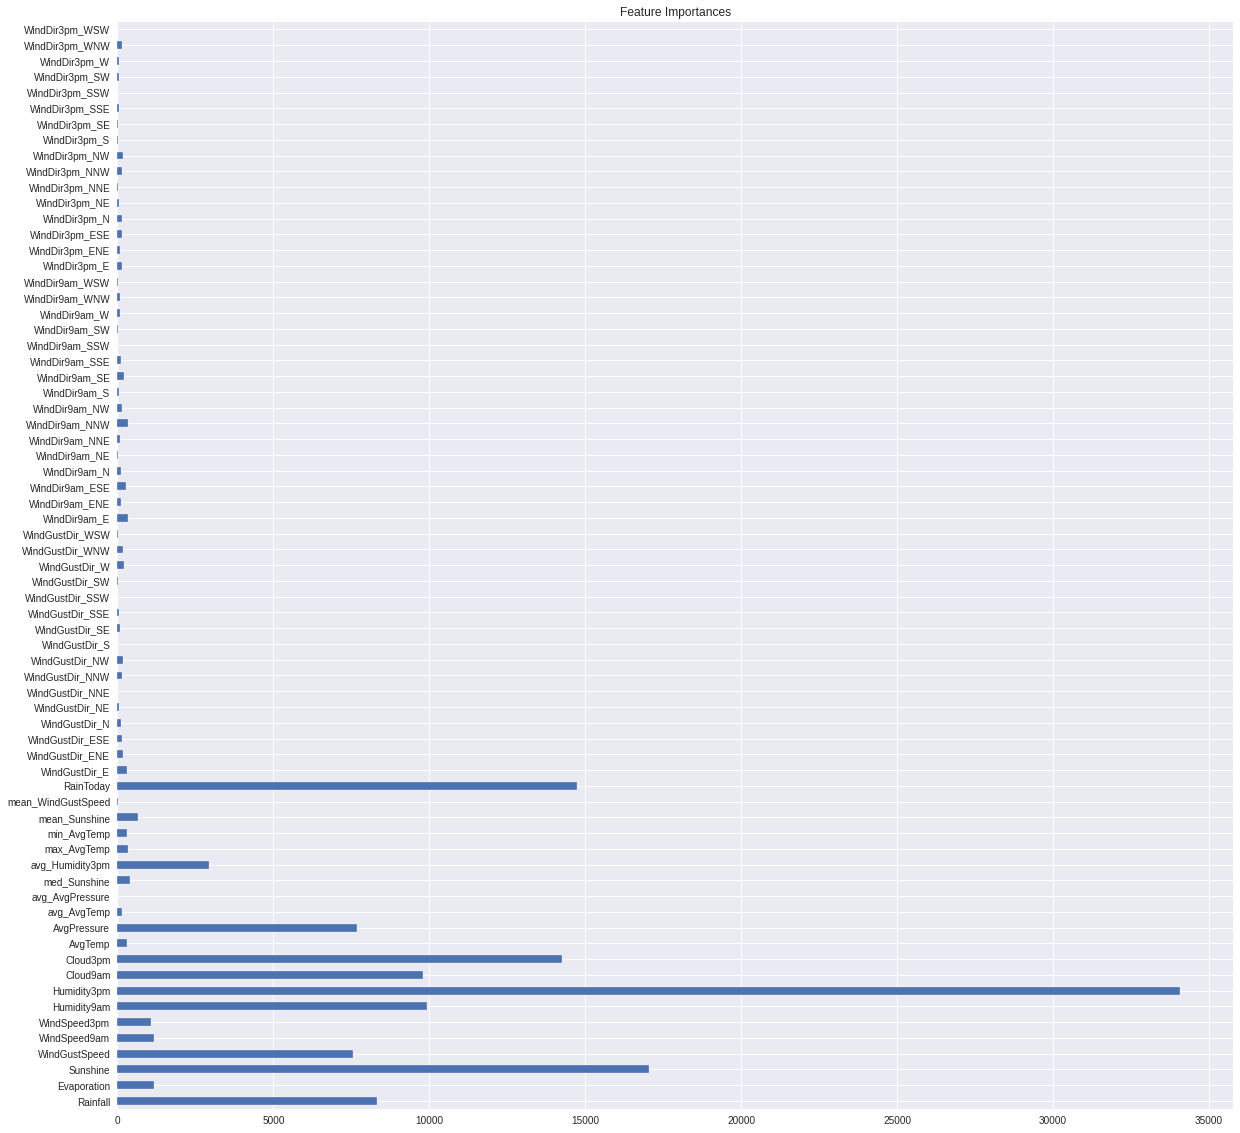

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df_X.astype(float).values
y = df_y.astype(float).values

filter = SelectKBest(f_classif, k = 9)
X_new_f = filter.fit_transform(X, y)

print('Sebelum feature selection ', X.shape)
print('Setelah feature selection ', X_new_f.shape)
print('Score of features ', filter.scores_)
print('Score of features ', filter.pvalues_)

cols = filter.get_support(indices=True)
features_df_new = df_X.iloc[:,cols]
print('The best features are', features_df_new.columns)

feat_importances = pd.Series(filter.scores_, index=df_X.columns)

plt.figure(figsize=(20,20))
feat_importances.plot(kind='barh')
plt.title('Feature Importances')
plt.show()

### Ada Boost Clasifier after feature selecting (filtering method)

In [ ]:
# Splitting data train and data test

X_train, X_test, y_train, y_test = train_test_split(X_new_f, df_y, test_size=0.3, random_state=123)

smote = SMOTE()
X_smote_new_f, y_smote_new_f = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy  0.7954193820619814
Precision  0.7170932480914223
Recall  0.7558326133820528
Confusion matrix  [[27403  5714]
 [ 3013  6528]]


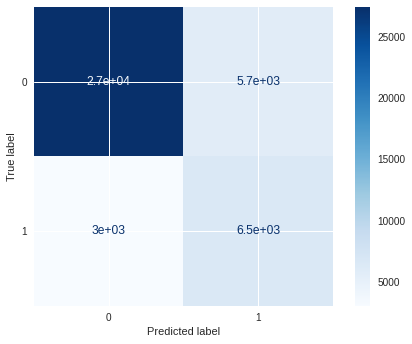

In [ ]:
abc = AdaBoostClassifier(random_state=42)
abc.fit(X_smote_new_f, y_smote_new_f)
y_pred = abc.predict(X_test)

abc.score(X_smote_new_f, y_smote_new_f)
acc_abc_train_f = round(abc.score(X_smote_new_f, y_smote_new_f) * 100, 2)

acc_abc_scr_f = metrics.accuracy_score(y_test, y_pred)
prc_abc_scr_f = metrics.precision_score(y_test, y_pred, average='macro')
rcl_abc_scr_f = metrics.recall_score(y_test, y_pred, average='macro') 

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(abc, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

### Random Forest Classifier after feature selecting (filtering method)

Accuracy  0.8340522293590885
Precision  0.7634102682573207
Recall  0.739079010895163
Confusion matrix  [[30167  2950]
 [ 4129  5412]]


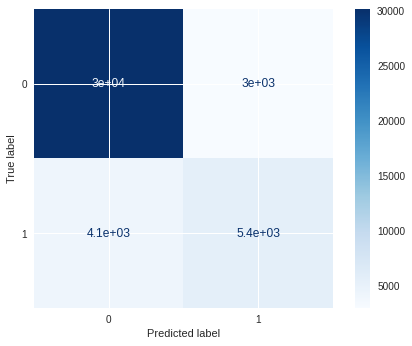

In [ ]:
rfc = RandomForestClassifier(n_estimators= 100, oob_score= True)
rfc.fit(X_smote_new_f, y_smote_new_f)
y_pred = rfc.predict(X_test)

rfc.score(X_smote_new_f, y_smote_new_f)
acc_rfc_train_f = round(rfc.score(X_smote_new_f, y_smote_new_f) * 100, 2)

acc_rfc_scr_f = metrics.accuracy_score(y_test, y_pred)
prc_rfc_scr_f = metrics.precision_score(y_test, y_pred, average='macro')
rcl_rfc_scr_f = metrics.recall_score(y_test, y_pred, average='macro') 

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(rfc, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## Embedded Method (Ada Boost Classifier)

Sebelum feature selection  (142193, 69)
Setelah feature selection  (142193, 21)
Score of features  [0.04 0.   0.06 0.1  0.02 0.02 0.   0.24 0.   0.08 0.04 0.1  0.04 0.02
 0.02 0.06 0.   0.   0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.
 0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.02 0.   0.02 0.02 0.02 0.   0.   0.   0.   0.02 0.   0.   0.  ]
0.014492753623188406
The best features are Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity3pm', 'Cloud3pm', 'AvgTemp', 'AvgPressure', 'avg_AvgTemp',
       'avg_AvgPressure', 'med_Sunshine', 'avg_Humidity3pm', 'mean_Sunshine',
       'WindDir9am_N', 'WindDir9am_NNE', 'WindDir3pm_N', 'WindDir3pm_NNE',
       'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_SW'],
      dtype='object')


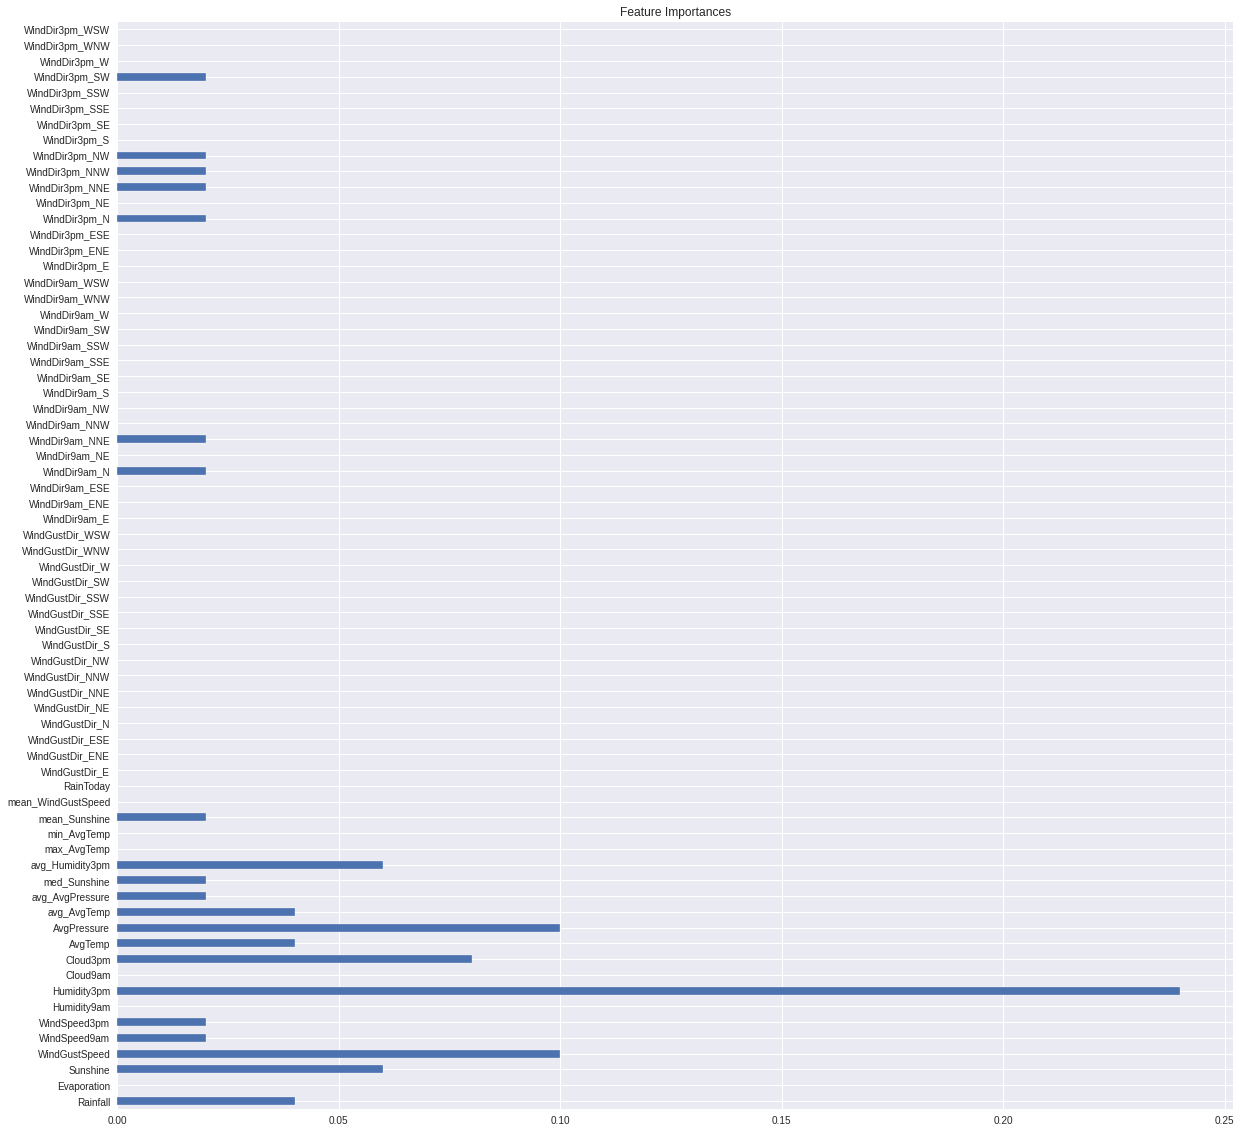

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel

abc = AdaBoostClassifier(random_state=42)
abc.fit(X, y)
embed = SelectFromModel(abc, prefit=True)
X_new_em_abc = embed.transform(X) # em = embedded method

print('Sebelum feature selection ', X.shape)
print('Setelah feature selection ', X_new_em_abc.shape)
print('Score of features ', abc.feature_importances_)
print(np.mean(abc.feature_importances_))
feat_importances = pd.Series(abc.feature_importances_, index=df_X.columns)

cols = embed.get_support(indices=True)
features_df_new = df_X.iloc[:,cols]
print('The best features are', features_df_new.columns)

plt.figure(figsize= (20,20))
feat_importances.plot(kind='barh')
plt.title('Feature Importances')
plt.show()

### Ada Boost Classifier after feature selecting (Embedded Method)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy  0.8069764170847203
Precision  0.7276868948359301
Recall  0.7568217363853552
Confusion matrix  [[28069  5048]
 [ 3186  6355]]


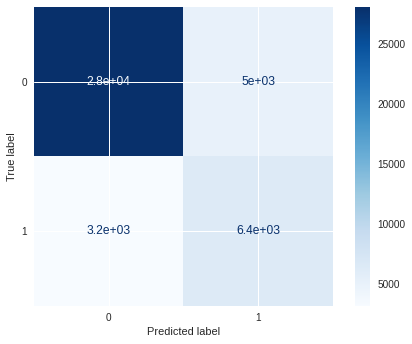

In [ ]:
# Splitting data train and data test

X_train, X_test, y_train, y_test = train_test_split(X_new_em_abc, df_y, test_size=0.3, random_state=123)

smote = SMOTE()
X_smote_new_em_abc, y_smote_new_em_abc = smote.fit_resample(X_train, y_train)

abc = AdaBoostClassifier(random_state=42)
abc.fit(X_smote_new_em_abc, y_smote_new_em_abc)
y_pred = abc.predict(X_test)

abc.score(X_smote_new_em_abc, y_smote_new_em_abc)
acc_abc_train_f = round(abc.score(X_smote_new_em_abc, y_smote_new_em_abc) * 100, 2)

acc_abc_scr_em_abc = metrics.accuracy_score(y_test, y_pred)
prc_abc_scr_em_abc = metrics.precision_score(y_test, y_pred, average='macro')
rcl_abc_scr_em_abc = metrics.recall_score(y_test, y_pred, average='macro') 

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(abc, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

### Random Forest Classifier After feature selecting (Embedded Method - Ada Boost Classifier)

Accuracy  0.8507431196961883
Precision  0.788998766885329
Recall  0.7661694278479216
Confusion matrix  [[30441  2676]
 [ 3691  5850]]


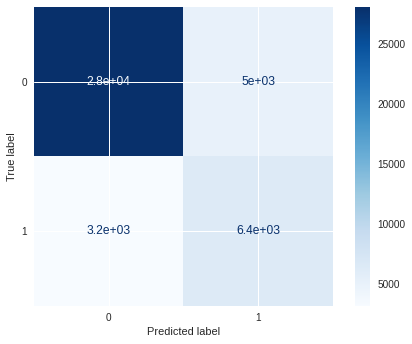

In [ ]:
# embedded method - Random Forest Versi Ditto

# X_train, X_test, y_train, y_test = train_test_split(X_new_em_abc, df_y, test_size=0.3, random_state=123)

# smote = SMOTE()
# X_smote_new_em_abc,  y_smote_new_em_abc = smote.fit_resample(X_train, y_train)

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_smote_new_em_abc,  y_smote_new_em_abc)
y_pred = rfc.predict(X_test)

rfc.score(X_smote_new_em_abc,  y_smote_new_em_abc)
acc_rfc_train_f = round(rfc.score(X_smote_new_em_abc,  y_smote_new_em_abc) * 100, 2)

acc_rfc_scr_em_abc = metrics.accuracy_score(y_test, y_pred)
prc_rfc_scr_em_abc = metrics.precision_score(y_test, y_pred, average='macro')
rcl_rfc_scr_em_abc = metrics.recall_score(y_test, y_pred, average='macro') 

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(abc, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## Embedded Method (Random Forest Classifier)

Sebelum feature selection  (142193, 69)
Setelah feature selection  (142193, 20)
Score of features  [0.04958553 0.02281831 0.05125534 0.05219046 0.02865134 0.03056888
 0.0497438  0.15766802 0.02141779 0.03469597 0.04226004 0.06233626
 0.02464998 0.02178147 0.01145329 0.02706907 0.03603264 0.03629033
 0.03730446 0.03656032 0.02863622 0.00222132 0.0021832  0.00208464
 0.00323029 0.00261129 0.00261463 0.00283696 0.00328215 0.00286774
 0.00254297 0.00261713 0.00282584 0.00273461 0.00418536 0.00310855
 0.00276849 0.00217255 0.00239423 0.00202421 0.00480242 0.0026862
 0.00336997 0.00315987 0.00336655 0.00256082 0.00243561 0.00229834
 0.00274739 0.00277599 0.00313808 0.00288231 0.00261238 0.00242039
 0.00233268 0.00226381 0.00352851 0.00295362 0.00294982 0.00348731
 0.00361062 0.00287288 0.00341142 0.00272687 0.00262806 0.00259443
 0.00303391 0.00328203 0.00279198]
0.014492753623188406
The best features are Index(['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
       '

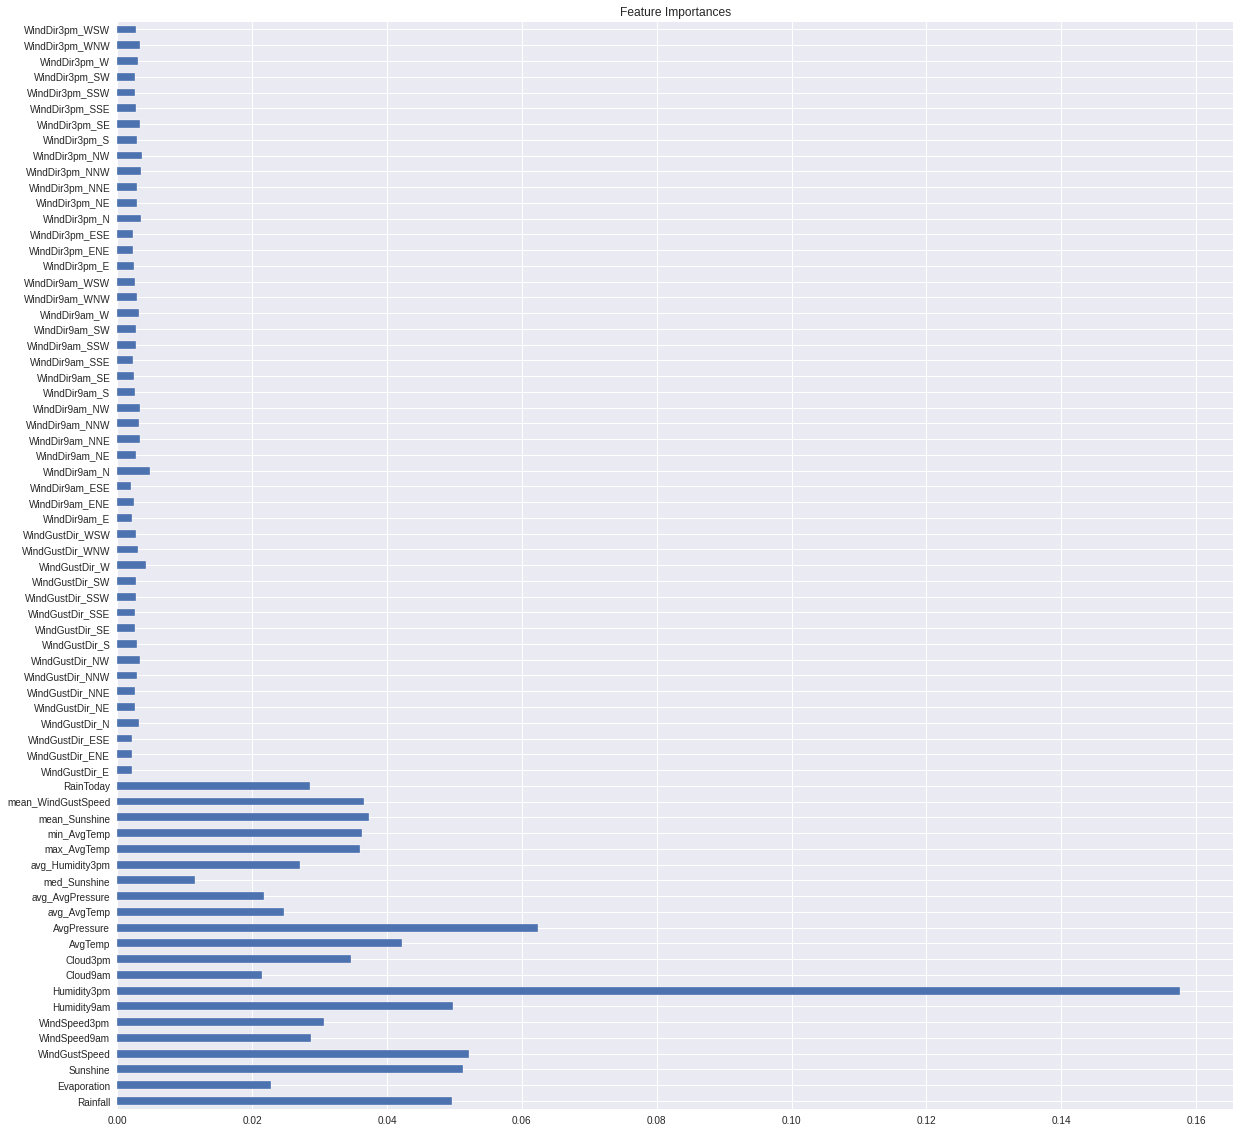

In [ ]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X, y)
embed = SelectFromModel(rfc, prefit=True)
X_new_em_rf = embed.transform(X) # em = embedded method

print('Sebelum feature selection ', X.shape)
print('Setelah feature selection ', X_new_em_rf.shape)
print('Score of features ', rfc.feature_importances_)
print(np.mean(rfc.feature_importances_))
feat_importances = pd.Series(rfc.feature_importances_, index=df_X.columns)

cols = embed.get_support(indices=True)
features_df_new = df_X.iloc[:,cols]
print('The best features are', features_df_new.columns)

plt.figure(figsize= (20,20))
feat_importances.plot(kind='barh')
plt.title('Feature Importances')
plt.show()

### Ada Boost Classifier after feature selecting (Embedded Method - Random Forest Classifier)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy  0.7960992076515542
Precision  0.7180642731258842
Recall  0.7573150627986491
Confusion matrix  [[27404  5713]
 [ 2985  6556]]


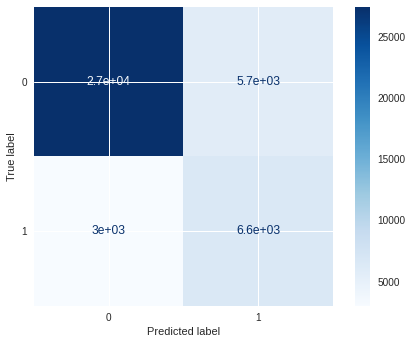

In [ ]:
# Splitting data train and data test
# ini masih versi kang Chaidier

X_train, X_test, y_train, y_test = train_test_split(X_new_em_rf, df_y, test_size=0.3, random_state=123)

smote = SMOTE()
X_smote_new_em_rf, y_smote_new_em_rf = smote.fit_resample(X_train, y_train)

abc = AdaBoostClassifier(random_state=42)
abc.fit(X_smote_new_em_rf, y_smote_new_em_rf)
y_pred = abc.predict(X_test)

abc.score(X_smote_new_em_rf, y_smote_new_em_rf)
acc_abc_train_f = round(abc.score(X_smote_new_em_rf, y_smote_new_em_rf) * 100, 2)

acc_abc_scr_em_rf = metrics.accuracy_score(y_test, y_pred)
prc_abc_scr_em_rf = metrics.precision_score(y_test, y_pred, average='macro')
rcl_abc_scr_em_rf = metrics.recall_score(y_test, y_pred, average='macro') 

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(abc, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

### Random Forest Classifier after feature selecting (Embedded Method - Random Forest Classifier)

Accuracy  0.8510947536218294
Precision  0.7894084802483674
Recall  0.7671793535053503
Confusion matrix  [[30435  2682]
 [ 3670  5871]]


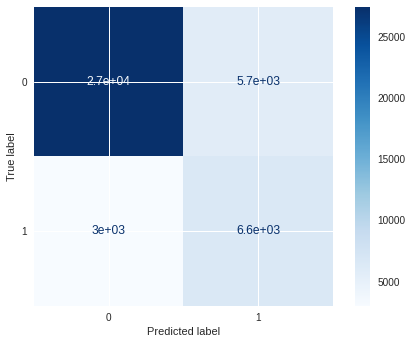

In [ ]:
# embedded method - Random Forest Versi Ditto

# X_train, X_test, y_train, y_test = train_test_split(X_new_em_rf, df_y, test_size=0.3, random_state=123)

# smote = SMOTE()
# X_smote_new_em_rf, y_smote_new_em_rf = smote.fit_resample(X_train, y_train)

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_smote_new_em_rf, y_smote_new_em_rf)
y_pred = rfc.predict(X_test)

rfc.score(X_smote_new_em_rf, y_smote_new_em_rf)
acc_rfc_train_f = round(rfc.score(X_smote_new_em_rf, y_smote_new_em_rf) * 100, 2)

acc_rfc_scr_em_rf = metrics.accuracy_score(y_test, y_pred)
prc_rfc_scr_em_rf = metrics.precision_score(y_test, y_pred, average='macro')
rcl_rfc_scr_em_rf = metrics.recall_score(y_test, y_pred, average='macro') 

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(abc, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## Wrapper Method

Sebelum feature selection  (142193, 69)
Setelah feature selection  (142193, 6)
Score of features  [ 1 22  1  1  7  9  4  1 35  5  3  1  2 11 12  1  6  8 10 13 38 39 41 43
 45 15 49 25 16 19 23 20 61 63 64 21 37 31 32 53 46 24 18 54 56 55 52 51
 42 50 26 44 48 27 28 29 14 33 30 34 36 40 47 17 57 58 59 60 62]


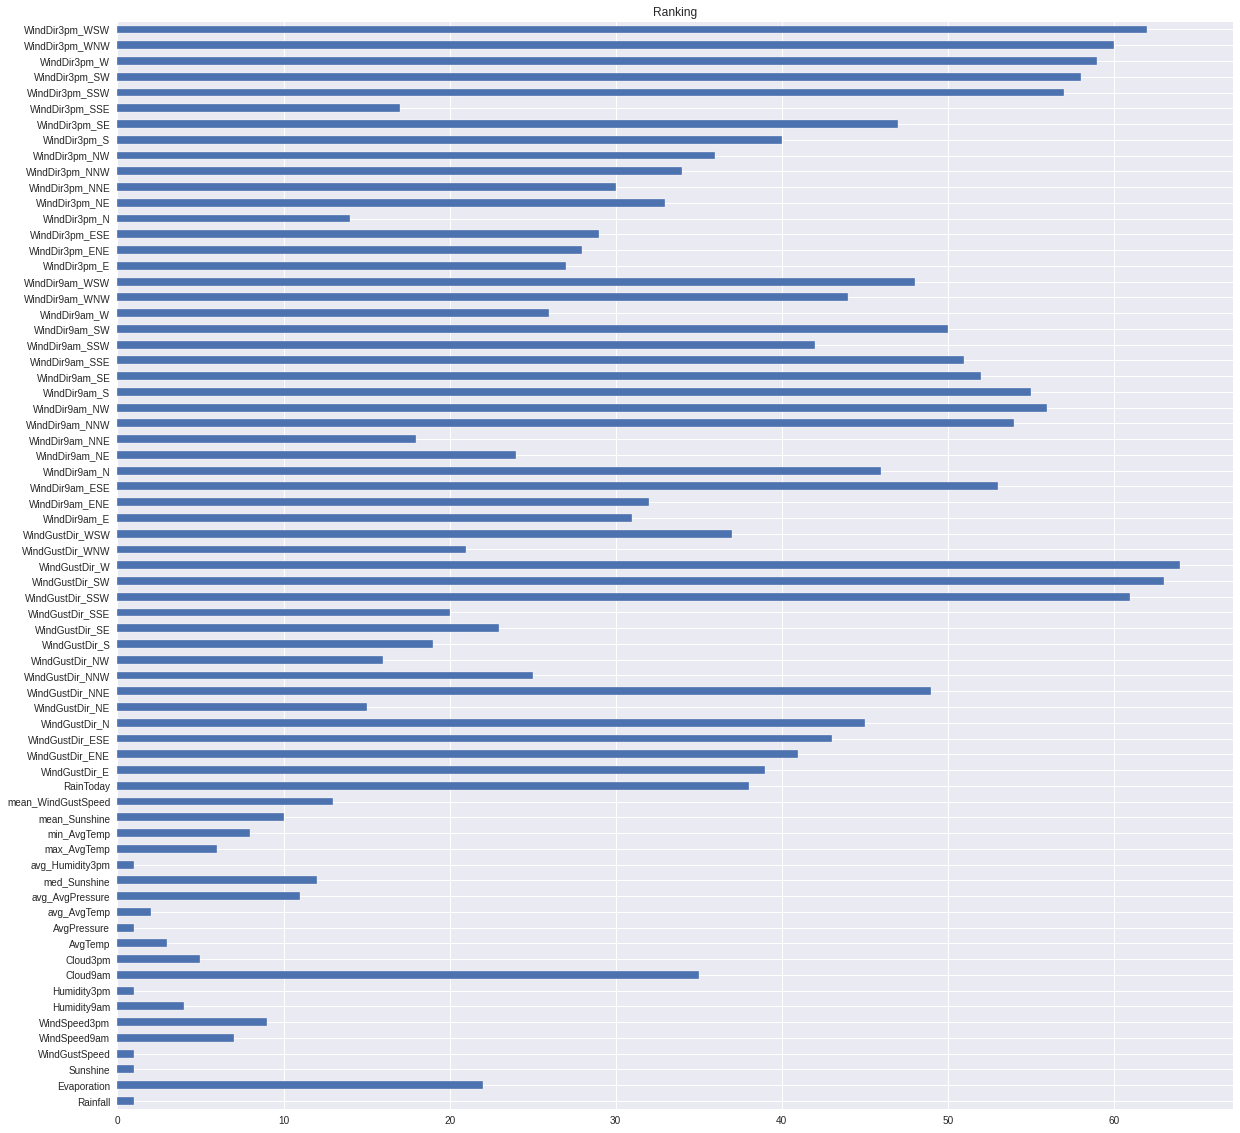

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC

X = df_X.astype(float).values
y = df_y.astype(float).values

estimator = DecisionTreeClassifier(max_depth = 8)
wrapper = RFECV(estimator)
X_new_w = wrapper.fit_transform(X, y)

print('Sebelum feature selection ', X.shape)
print('Setelah feature selection ', X_new_w.shape)
print('Score of features ', wrapper.ranking_)

feat_importances = pd.Series(wrapper.ranking_, index=df_X.columns)

plt.figure(figsize = (20,20))
feat_importances.plot(kind='barh')
plt.title('Ranking')
plt.show()

### Ada Boost Classifier after feature selecting (Wrapper Method)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy  0.7904965071030053
Precision  0.7164884255745042
Recall  0.7661300157907431
Confusion matrix  [[26832  6285]
 [ 2652  6889]]


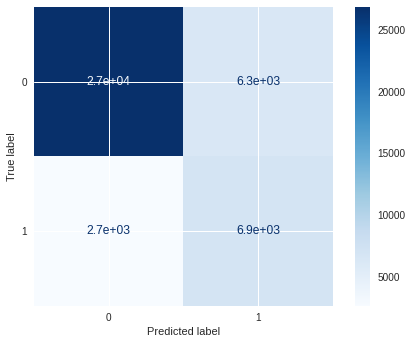

In [ ]:
# Splitting data train and data test

X_train, X_test, y_train, y_test = train_test_split(X_new_w, df_y, test_size=0.3, random_state=123)

smote = SMOTE()
X_smote_new_w, y_smote_new_w = smote.fit_resample(X_train, y_train)

abc = AdaBoostClassifier(random_state=42)
abc.fit(X_smote_new_w, y_smote_new_w)
y_pred = abc.predict(X_test)

abc.score(X_smote_new_w, y_smote_new_w)
acc_abc_train_f = round(abc.score(X_smote_new_w, y_smote_new_w) * 100, 2)

acc_abc_scr_w = metrics.accuracy_score(y_test, y_pred)
prc_abc_scr_w = metrics.precision_score(y_test, y_pred, average='macro')
rcl_abc_scr_w = metrics.recall_score(y_test, y_pred, average='macro') 

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(abc, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.6065595421527625

### Random Forest Classifier after feature selecting (Wrapper Method)

Accuracy  0.830301467485583
Precision  0.7557414750091798
Recall  0.7532278286519718
Confusion matrix  [[29563  3554]
 [ 3685  5856]]


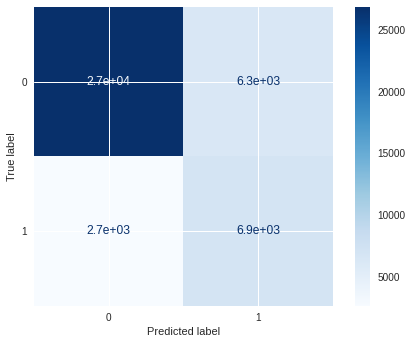

In [ ]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_smote_new_w, y_smote_new_w)
y_pred = rfc.predict(X_test)

rfc.score(X_smote_new_w, y_smote_new_w)
acc_rfc_train_f = round(rfc.score(X_smote_new_w, y_smote_new_w) * 100, 2)

acc_rfc_scr_w = metrics.accuracy_score(y_test, y_pred)
prc_rfc_scr_w = metrics.precision_score(y_test, y_pred, average='macro')
rcl_rfc_scr_w = metrics.recall_score(y_test, y_pred, average='macro') 

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(abc, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## Comparison Between Feature Selection Methods

### Ada Boost Classifier

In [ ]:
abc_result = pd.DataFrame({
    'Model': ['Filtering', 'Embedded - AdaBoostClasifier', 'Embedded - RandomForestClassifier', 'Wrapper'],
    'Accuracy_Score': [acc_abc_scr_f, acc_abc_scr_em_abc, 
                       acc_abc_scr_em_rf, acc_abc_scr_w],
    'Precision_Score': [prc_abc_scr_f, prc_abc_scr_em_abc, 
                        prc_abc_scr_em_rf, prc_abc_scr_w],
    'Recall_Score': [rcl_abc_scr_f, rcl_abc_scr_em_abc, 
                     rcl_abc_scr_em_rf, rcl_abc_scr_w]})
abc_result = abc_result.sort_values(by='Recall_Score', ascending=False)
abc_result = abc_result.set_index('Model')
abc_result.head()

Accuracy_Score  ...  Recall_Score
Model                                              ...              
Wrapper                                  0.790497  ...      0.766130
Embedded - RandomForestClassifier        0.796099  ...      0.757315
Embedded - AdaBoostClasifier             0.806976  ...      0.756822
Filtering                                0.795419  ...      0.755833

[4 rows x 3 columns]

### RandomForestClassifier

In [ ]:
rfc_result = pd.DataFrame({
    'Model': ['Filtering', 'Embedded - AdaBoostClasifier', 'Embedded - RandomForestClassifier', 'Wrapper'],
    'Accuracy_Score': [acc_rfc_scr_f, acc_rfc_scr_em_abc, 
                       acc_rfc_scr_em_rf, acc_rfc_scr_w],
    'Precision_Score': [prc_rfc_scr_f, prc_rfc_scr_em_abc, 
                        prc_rfc_scr_em_rf, prc_rfc_scr_w],
    'Recall_Score': [rcl_rfc_scr_f, rcl_rfc_scr_em_abc, 
                     rcl_rfc_scr_em_rf, rcl_rfc_scr_w]})
rfc_result = rfc_result.sort_values(by='Recall_Score', ascending=False)
rfc_result = rfc_result.set_index('Model')
rfc_result.head()

Accuracy_Score  ...  Recall_Score
Model                                              ...              
Embedded - RandomForestClassifier        0.851095  ...      0.767179
Embedded - AdaBoostClasifier             0.850743  ...      0.766169
Wrapper                                  0.830301  ...      0.753228
Filtering                                0.834052  ...      0.739079

[4 rows x 3 columns]

# Hyperparameter Tuning

## Hyperparameter Tuning for Random Forest Classifier

In [ ]:
# Splitting data train and data test

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=123)

smote = SMOTE()
X_smote, y_smote_= smote.fit_resample(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# param_grid = { "criterion" : ["gini", "entropy"], 
#               "min_samples_leaf" : [1, 5, 10, 25, 50, 70], 
#               "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], 
#               "n_estimators": [100, 400, 700, 1000, 1500]}

# from sklearn.model_selection import GridSearchCV, cross_val_score

# rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
# clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
# clf.fit(X_train, Y_train)
# clf.bestparams

In [ ]:
# random_forest = RandomForestClassifier(criterion = "gini", 
#                                        min_samples_leaf = 1, 
#                                        min_samples_split = 10,   
#                                        n_estimators=100, 
#                                        max_features='auto', 
#                                        oob_score=True, 
#                                        random_state=1, 
#                                        n_jobs=-1)

# random_forest.fit(X_train, Y_train)
# Y_prediction = random_forest.predict(X_test)

# random_forest.score(X_train, Y_train)

# print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

Random Forest Classifier After Hyperparameter Tuning (GridSearchCV)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new_em_rf, df_y, test_size=0.3, random_state=123)

smote = SMOTE()
X_smote_new_em_rf, y_smote_new_em_rf = smote.fit_resample(X_train, y_train)

rfc = RandomForestClassifier(bootstrap = True,
 max_depth = 4,
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split = 2,
 n_estimators = 72)
rfc.fit(X_smote_new_em_rf, y_smote_new_em_rf)
y_pred = rfc.predict(X_test)

rfc.score(X_smote_new_em_rf, y_smote_new_em_rf)
acc_rfc_train_em_gr = round(rfc.score(X_smote_new_em_rf, y_smote_new_em_rf) * 100, 2)

acc_rfc_scr_em_gr = metrics.accuracy_score(y_test, y_pred)
prc_rfc_scr_em_gr = metrics.precision_score(y_test, y_pred, average='macro')
rcl_rfc_scr_em_gr = metrics.recall_score(y_test, y_pred, average='macro') 

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(rfc, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

Random Forest Classifier After Hyperparameter Tuning (RandomisedSearchCV)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new_em_rf, df_y, test_size=0.3, random_state=123)

smote = SMOTE()
X_smote_new_em_rf, y_smote_new_em_rf = smote.fit_resample(X_train, y_train)

rfc = RandomForestClassifier(bootstrap = False,
 max_depth = 4,
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split = 5,
 n_estimators = 33)
rfc.fit(X_smote_new_em_rf, y_smote_new_em_rf)
y_pred = rfc.predict(X_test)

rfc.score(X_smote_new_em_rf, y_smote_new_em_rf)
acc_rfc_train_em_gr = round(rfc.score(X_smote_new_em_rf, y_smote_new_em_rf) * 100, 2)

acc_rfc_scr_em_gr = metrics.accuracy_score(y_test, y_pred)
prc_rfc_scr_em_gr = metrics.precision_score(y_test, y_pred, average='macro')
rcl_rfc_scr_em_gr = metrics.recall_score(y_test, y_pred, average='macro') 

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(rfc, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## Ada Boost Classifier

### Exploring Maximum Depth of Tree

In this case. we are going to use Decision Tree Classifier as Base Estimator. So we well tune the max depth of tree from 1 to 15.

In [ ]:
# models = get_models()
# # evaluate the models and store results
# results, names = list(), list()
# for name, model in models.items():
# 	# evaluate the model
# 	scores = evaluate_model(model, X_smote, y_smote)
# 	# store the results
# 	results.append(scores)
# 	names.append(name)

# 	# summarize the performance along the way
	# print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

So the best **max depth for Decision Tree Classifier** as base estimator is **15** with accuracy 0.88

In [ ]:
param_grid = {'algorithm' : ['SAMME', 'SAMME.R'], 
              "learning_rate" : [0.25, 0.5, 0.75, 1, 1.25, 1.5], 
              "random_state" : [5, 10, 20, 40, 80, 100, 120], 
              "n_estimators": [100, 400, 700, 1000, 1500]}

from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

base = DecisionTreeClassifier(max_depth=15)
abc = AdaBoostClassifier(base_estimator=base)
rsc_rand = RandomizedSearchCV(estimator = abc, param_distributions= param_grid, n_jobs = -1)
rsc_rand.fit(X_smote_new_em_rf, y_smote_new_em_rf)
rsc_rand.best_params_